<p style="font-size: 24px; text-align: center; color: blue"><b>Analysis of Weather Observations from 1980 - 2021 on Select U.S. Cities</b></p>
<p style="font-size: 20px; text-align: center; color: blue">Brendon Gory, 13 May 2023</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
	<ul>
        <li><a href="#Abstract">1 Abstract</a></li>
        <li><a href="#Introduction">2 Introduction</a></li>
        <li><a href="#Methodology">3 Methodology</a></li>
        <ul>
            <li><a href="#Libraries">3.1 Load libraries and defaults</a></li>
            <li><a href="#Exploratory-data-analysis">3.2 Exploratory data analysis</a></li>
            <ul>
                <li><a href="#Data-statistics">3.2.1 Overview of data statistics</a></li>
                <li><a href="#Feature-names-and-description">3.2.2 Feature names and description</a></li>
                <li><a href="#City-weather-extremes">3.2.3 Weather extremes per city</a></li>
                <li><a href="#Daily-observations-computed-from-hourly-observations">3.2.4 Daily observations computed from hourly observations</a></li>
                <li><a href="#Exploratory-data-analysis-summary">3.2.5 Summary</a></li>
            </ul>
            <li><a href="#Dataset-visualizations">3.3 Dataset visualizations</a></li>
            <ul>
                <li><a href="#Yearly-average-temperature">3.3.1 Average yearly temperature</a></li>
                <li><a href="#Yearly-precipitation">3.3.2 Yearly total precipitation</a></li>
                <li><a href="#Average-humidity">3.3.3 Average yearly humidity</a></li>
                <li><a href="#Yearly-high-heat-days">3.3.4 Yearly high-heat days</a></li>
                <li><a href="#Yearly-days-below-freezing">3.3.5 Yearly days below freezing</a></li>
                <li><a href="#Yearly-days-with-precipitation">3.3.6 Yearly days with precipitation</a></li>
                <li><a href="#Dataset-visualizations-summary">3.3.7 Summary</a></li>
            </ul>
        </ul>
        <li><a href="#Analysis">4 Analysis</a></li>
        <ul>
            <li><a href="#Show-daily-averages-over-20-years">4.1 Show daily averages over 20 years</a></li>
            <ul>
                <li><a href="#Daily-averages-over-20-years-summary">4.1.1 Summary</a></li>
            </ul>
            <li><a href="#Jaccard-similarity">4.2 Jaccard similarity</a></li>
            <ul>
                <li><a href="#Temperature-similarity">4.2.1 Temperature similarity</a></li>
                <li><a href="#Jaccard-similarity-summary">4.2.2 Summary</a></li>
            </ul>
            <li><a href="#Hamming-distance">4.3 Hamming distance</a></li>
            <ul>
                <li><a href="#Calculate-Hamming-distance-for-temperatures">4.3.1 Calculate Hamming distance for temperatures</a></li>
                <li><a href="#Calculate-Hamming-distance-for-rainy/snowy-days">4.3.2 Calculate Hamming distance for rainy/snowy days</a></li>
                <li><a href="#Calculate-Hamming-distance-for-precipitation">4.3.3 Calculate Hamming distance for precipitation</a></li>
                <li><a href="#Hamming-distance-summary">4.3.4 Summary</a></li>
            </ul>
            <li><a href="#Clustering">4.4 Clustering</a></li>
            <ul>
                <li><a href="#City-climate">4.4.1 City climate</a></li>
                <li><a href="#Temperature-departures-from-average">4.4.2 Temperature departures from average</a></li>
                <li><a href="#Precipitation-departures-from-average">4.4.3 Precipitation departures from average</a></li>
                <li><a href="#Clustering-summary">4.4.4 Summary</a></li>
            </ul>
            <li><a href="#Time-series">4.5 Time series</a></li>
            <ul>
                <li><a href="#Show-all-observations-for-only-Atlanta's-average-highs">4.5.1  Show all observations for only Atlanta's average highs</a></li>
                <li><a href="#Compress-time-series-(90-days,-step-45)">4.5.2 Compress time series (90 days, step 45)</a></li>
                <li><a href="#Apply-exponential-decay-on-high-temperature-averages">4.5.3 Apply exponential decay on high temperature averages</a></li>
                <li><a href="#Apply-exponential-decay-on-daily-precipitation-totals">4.5.4 Apply exponential decay on daily precipitation totals</a></li>
                <li><a href="#Apply-exponential-decay-on-daily-humidity">4.5.5 Apply exponential decay on daily humidity</a></li>
                <li><a href="#Apply-exponential-decay-on-daily-max-wind-speeds">4.5.6 Apply exponential decay on daily max wind speeds</a></li>
                <li><a href="#Time-series-summary">4.5.7 Summary</a></li>
            </ul>            
        </ul>
        <li><a href="#Conclusion">5 Conclusion</a></li>
        <li><a href="#Conclusion">6 Appendix</a></li>
    </ul>
</div>

# Abstract
**Certain Cities Might Be Experiencing More Change or Different Changes**

The ensuing analysis will examine sixteen specific U.S. cities: Atlanta, GA; Billings, MT; Boston, MA; Chicago, IL; Dallas, TX; Denver, CO; Los Angeles, CA; Miami, FL; Minneapolis, MN; New Orleans, LA; New York, NY; Phoenix, AZ; San Francisco, CA; Seattle, WA; St. Louis, MO; and Washington, D.C. These cities have been chosen as they are located in different regions of the country. We wanted to explore desert regions, tropical regions, seasonal regions, costal regions, and land-locked regions. The data have been downloaded from https://pirateweather.net. They transferred data from https://Darksky.net, which no longer hosts meteorological observations available by API. The API returns hourly observations in JSON format for a specific day, longitude and latitude. We captured data as far back as the site held data for the 16 cities (01/02/1980). Not all data for 2022 had been migrated since the inception of this project, so the data were capped at 12/13/2021.

All weather is composed of just three elements: wind, temperature and water vapor[^1]. These elements give rise to all weather phenomena. The features captured per hourly observation are wind speed and direction, actual temperature and apparent temperature, dew point, and barometric pressure. The observable weather, `summary` column indicates the type of weather occurring at the time of measurement, i.e. clear-night or rain. Each feature will be defined in EDA.

The comparisons done will evaluate similarities of measured weather among all the cities over time spans. Since they are too many data points to compare, similarity algorithms will be employed for analysis. We hope similarities will emerge be among cities that indicated certain regions of the country are experiencing  more drastic conditions as a result of climate change.

[^1]: https://windy.app/blog/what-are-the-main-weather-elements.html

# Introduction
**Climate Change**

As the planets heats up from man-made emissions, not all areas on Earth experience the same change. Some regions can be cooler and wetter, while others do become hotter and drier[^2]. Unexpectedly, winters can be colder and even more extreme[^3]. By reading many decades worth of hourly observations, it should become apparent which regions within the continental U.S. have experience different departures from the average over the years. All cities may show an increase in temperature average, but some cities may actually experience colder temperatures in certain timeframes. There might be cities that shared the same departures of temperatures in the same direction. Some cities might experience the opposite effect. By running similarity metrics on the cities, we hope to show which cities trended in the same direction over certain timeframes.

[^2]: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature
[^3]: https://www.bbc.com/news/science-environment-58425526

# Methodology

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import glob
import os
import warnings
import itertools
import collections
import random
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import combinations
from scipy.spatial.distance import hamming

from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units

from scipy.stats import ttest_ind

warnings.filterwarnings('ignore')

# Plot defaults
title_size = 20
subtitle_size = 16
x_y_label_size = 12
legend_font_size = 12
pad_space = 2
fig_size = (20, 14)

C:\Users\brend\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#### Function that displays grids in a readable format

In [2]:
def pretty_print(title, in_dict, cols=3, key_padding=8, val_padding=20, rows=0):
    print(f'{title}', end='')
    
    # If number of rows isn't specfied, print all rows
    print_last = False
    if rows == 0:
        print_last = True
        rows = len(in_dict.keys())
        
    val_list = ''
    row_count = 0
    for idx, val in enumerate(in_dict):
        if idx % cols == 0:
            print(val_list)
            val_list = ''
            if row_count == rows:
                break
            row_count += 1

        val_list += (str(val) + ':').ljust(key_padding, ' ') + str(in_dict[val]).ljust(val_padding, ' ') + '\t'
    
    if val_list != '' and print_last == True:
        print(val_list + '\n')
        
def pretty_df(title, in_dict, col_names, cols=3, rows=0):
    print(f'{title}', end='')

    df = pd.DataFrame(columns=col_names * int(cols / 2))

    # If number of rows isn't specfied, print all rows
    print_last = False
    if rows == 0:
        print_last = True
        rows = len(in_dict.keys())

    val_list = []
    row_count = 0
    for idx, val in enumerate(in_dict):
        if (idx * 2) % cols == 0 and idx > 0:
            df.loc[row_count] = val_list
            val_list = []
            row_count += 1
            if row_count == rows:
                break

        val_list.extend([str(val), str(in_dict[val])])

    if val_list != '' and print_last == True:
        while len(val_list) < cols:
            # Pad list length to match column length in data frame
            val_list.extend(['', ''])        
        df.loc[row_count] = val_list
        
    display(df.style.hide(subset=None))

## Exploratory data analysis
The data were manually downloaded using PirateWeather's API. The API accepts the longitude, latitude and time period. For this project, the hourly observations option returned JSON data with 24 observations per calendar day. The JSON was loaded by Python, then transformed into a Pandas data frame. After some manipulation of setting data types and removing unneeded features, Python saved the data frame into a CSV file. Finally, all CSV files for the sixteens cities were loaded into a master CSV file that contained 41 years' of hourly observations for all cities.

### Data statistics

In [3]:
# Initial load
weather = pd.read_csv('City Data/All Cities.csv', index_col=0)
weather['time'] = pd.to_datetime(weather['time'], format='%Y-%m-%d %H:%M')

# This variable will be referenced throughout the project. Set it once since it is an expensive operation
cities = list(np.unique(weather.index))

In [4]:
print(f'Total Rows: {weather.shape[0]} Having {weather.shape[1]} Features')
print(f'\nTotal Cities: {len(cities)}')
display(pd.DataFrame(columns=['City'], data=cities).style.hide(subset=None))
print('\nData Statistics:')
display(weather.describe())
print('\nFirst 10 observations:')
display(weather.head(10))

Total Rows: 5890944 Having 11 Features

Total Cities: 16



Data Statistics:


precipAccumulation   temperature  apparentTemperature      dewPoint  \
count        5.890920e+06  5.890944e+06         5.890944e+06  5.890944e+06   
mean         4.104926e-03  5.809671e+01         6.029896e+01  4.528558e+01   
std          1.864777e-02  1.912768e+01         2.586197e+01  1.841973e+01   
min          0.000000e+00 -4.027000e+01        -5.958000e+01 -4.589000e+01   
25%          0.000000e+00  4.546000e+01         4.194000e+01  3.252000e+01   
50%          0.000000e+00  5.918000e+01         6.100000e+01  4.726000e+01   
75%          0.000000e+00  7.268000e+01         8.029000e+01  5.907000e+01   
max          1.219000e+00  1.195900e+02         1.239300e+02  8.393000e+01   

           pressure     windSpeed   windBearing    cloudCover  
count  5.890944e+06  5.890944e+06  5.890944e+06  5.890944e+06  
mean   9.821298e+02  7.181747e+00  1.869184e+02  1.587600e-01  
std    5.022058e+01  4.007864e+00  9.760084e+01  2.702226e-01  
min    7.962300e+02  0.000000e+00  0.000000e+00  0.000000e+00  
25%    9.828400e+02  4.250000e+00  1.071000e+02  0.000000e+00  
50%    9.988400e+02  6.430000e+00  1.948600e+02  0.000000e+00  
75%    1.010260e+03  9.420000e+00  2.666300e+02  2.280000e-01  
max    1.048540e+03  7.706000e+01  3.599700e+02  1.000000e+00


First 10 observations:


time summary  precipAccumulation precipType  \
location                                                              
Atlanta  1980-01-01 00:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 01:00:00  Cloudy                0.00       rain   
Atlanta  1980-01-01 02:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 03:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 04:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 05:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 06:00:00  Cloudy                0.02       rain   
Atlanta  1980-01-01 07:00:00  Cloudy                0.02       rain   
Atlanta  1980-01-01 08:00:00  Cloudy                0.01       rain   
Atlanta  1980-01-01 09:00:00  Cloudy                0.01       rain   

          temperature  apparentTemperature  dewPoint  pressure  windSpeed  \
location                                                                    
Atlanta         41.41                35.48     37.81    977.74       9.69   
Atlanta         41.29                35.35     38.14    977.44       9.67   
Atlanta         41.41                35.55     38.59    976.92       9.53   
Atlanta         40.39                34.00     38.59    976.65      10.22   
Atlanta         40.28                33.47     39.27    976.21      11.18   
Atlanta         37.92                29.51     37.69    976.92      13.85   
Atlanta         37.81                28.83     37.58    976.30      15.49   
Atlanta         37.69                28.98     37.24    976.90      14.58   
Atlanta         37.81                29.11     37.13    977.14      14.63   
Atlanta         38.03                29.38     36.68    977.66      14.67   

          windBearing  cloudCover  
location                           
Atlanta        281.63        0.00  
Atlanta        280.82        0.00  
Atlanta        280.98        0.00  
Atlanta        280.23        0.00  
Atlanta        282.99        0.00  
Atlanta        291.91        0.00  
Atlanta        296.80        0.00  
Atlanta        300.49        0.00  
Atlanta        299.74        0.00  
Atlanta        296.57        0.85

### Feature names and description
| Column | DataType | Description | Values/Format |
| :-- | :-- | :-- | :-- |
| `time` | datetime | Time observation was recorded | Year-Month-Day Hour:Minute:Second|
| `summary` | string | Observable weather | clear-day, clear-night, cloudy, partly-cloudy-day, partly-cloudy-night, rain, snow |
| `precipAccumulation` | float | Amount of precipitation measured between observations | 00.000 |
| `precipType` | string | Kind of precipitation observed | none, rain, snow |
| `temperature` | float | Actual current temperature | +/- 000.00 |
| `apparentTemperature` | float | What the temperature feels like (wind chill/heat index) | +/- 000.00 |
| `dewPoint` | float | Current temperature to which air must be cooled to become saturated with water vapor. Measures moisture in air. | +- 00.00 |
| `pressure` | float | Current pressure within the atmosphere of Earth. Indicates fair or stormy weather. | 000.00 |
| `windSpeed` | float | Current windspeed at time of observation | 000.00 |
| `windBearing` | float | Direction from which the wind is coming | 0.00 - 359.99 |
| `cloudCover` | float | Amount of cloud cover in the sky. Scaled 0 to 1, 0 being no cloud cover and 1 being completely cloudy | 0.000 - 1.0 |
| `year` | integer | Year of observation | 1980 - 2023 |
| `month` | integer | Month of observation | 1 - 12 |
| `day` | integer | Month of observation | 1 - 31 |
| `hour` | integer | Hour of observation (24-hour clock) | 0 - 23 |

### City weather extremes

In [5]:
%%time
df_stats = pd.DataFrame(columns=['Avg Temp', 'Std Dev Temp', 'Max Temp', 'Heat Index', 'Min Temp', \
                                 'Wind Chill', 'Avg Precip (inches/yr)', 'Max Wind Speed'])
for idx, city in enumerate(cities):
    df_city = weather[weather.index==city]
    avg_temp = round(np.mean(df_city['temperature']), 2)
    std_temp = round(np.std(df_city['temperature']), 2)
    max_temp = max(df_city['temperature'])
    heat_index = max(df_city['apparentTemperature'])
    min_temp = min(df_city['temperature'])
    wind_chill = min(df_city['apparentTemperature'])
    avg_precip = round(np.sum(df_city['precipAccumulation']) / 41, 2)
    max_wind_speed = max(df_city['windSpeed'])
    df_stats.loc[city] = [avg_temp, std_temp, max_temp, heat_index, min_temp, wind_chill, avg_precip, max_wind_speed]
    
display(df_stats)

Avg Temp  Std Dev Temp  Max Temp  Heat Index  Min Temp  \
Atlanta           61.90         16.23    106.09      117.96     -7.31   
Billings          48.29         21.51    106.77      105.72    -40.27   
Boston            50.81         17.09     97.88      112.99     -8.88   
Chicago           50.37         19.95     99.91      122.47    -22.27   
Dallas            66.38         17.16    108.79      123.93     -2.02   
Denver            48.73         20.01    100.02      103.46    -25.53   
Los Angeles       64.10         11.12    112.96      116.46     27.68   
Miami             76.23          6.64     93.04      114.24     34.77   
Minneapolis       45.83         23.24    101.93      120.86    -32.06   
New Orleans       69.39         12.43     97.43      120.82     14.18   
New York          53.00         18.06    102.61      117.30    -10.68   
Phoenix           73.53         18.26    119.59      122.32     21.72   
San Francisco     55.70          5.79     95.29       96.82     27.46   
Seattle           52.33         10.98    100.81      112.93      5.74   
St. Louis         56.22         19.99    105.19      122.92    -16.53   
Washington DC     56.74         18.33    104.41      123.52     -7.76   

               Wind Chill  Avg Precip (inches/yr)  Max Wind Speed  
Atlanta            -26.02                   48.24           36.96  
Billings           -59.58                   18.30           33.79  
Boston             -31.39                   46.06           38.25  
Chicago            -48.35                   39.26           35.45  
Dallas             -14.35                   41.24           31.91  
Denver             -38.05                   22.60           31.42  
Los Angeles         21.93                   14.33           24.09  
Miami               25.25                   44.22           77.06  
Minneapolis        -52.26                   35.05           27.42  
New Orleans         -2.99                   55.92           73.12  
New York           -25.29                   47.40           32.88  
Phoenix             15.77                   11.29           28.02  
San Francisco       20.30                   22.92           39.39  
Seattle             -4.71                   55.24           30.88  
St. Louis          -40.94                   44.26           26.78  
Washington DC      -26.00                   43.48           28.30

Wall time: 5.24 s


### Daily observations computed from hourly observations

In [6]:
%%time
city_daily_obs = []
days_observed = sorted(set(zip(weather['time'].dt.year, weather['time'].dt.month, weather['time'].dt.day)))

i = 0
for city in cities:
    df_city = weather[weather.index==city][['time', 'temperature', 'precipAccumulation', 'dewPoint', 'windSpeed']]
    
    # Break down the year components so the filtering runs faster
    df_city['year'], df_city['month'], df_city['day'] = \
            df_city['time'].dt.year, df_city['time'].dt.month, df_city['time'].dt.day
    df_city.drop(columns=['time'], inplace=True)
    
    for year, month, day in days_observed:
        day_as_date = str(year) + '-' + str(month) + '-' + str(day)
        city_time_filter = (df_city['year'] == year) & (df_city['month'] == month) & (df_city['day'] == day)
        df_filtered = df_city[city_time_filter]
        if df_filtered.shape[0] == 0:
            print(f'Missing data for {city}: {year}-{month}-{day}')
            """
            It has been discovered a handful of observations were duplicated
            from the previous day. As a fix, just take the observations from the previous day
            print(f'Missing data for {city}: {year}-{month}-{day}')
            print(f'\tUsing observations instead from {year}-{month}-{day}')
            """
            day = int(day) - 1
            print(f'\tUsing observations instead from {year}-{month}-{day}')
            city_time_filter = (df_city['year'] == year) & (df_city['month'] == month) & (df_city['day'] == day)
            df_filtered = df_city[city_time_filter]

        high = max(df_filtered['temperature'])
        low = min(df_filtered['temperature'])
        precipTotal = round(np.sum(df_filtered['precipAccumulation']), 3)
        humidity = round(relative_humidity_from_dewpoint(df_filtered['temperature'].values * units.degF, \
                                            df_filtered['dewPoint'].values * units.degF).to('percent').mean(), 2)
        humidity = float(str(humidity).replace(' percent',''))
        maxWind = max(df_filtered['windSpeed'])
        city_daily_obs.append([day_as_date, city, high, low, precipTotal, humidity, maxWind])

cols = ['Date', 'City', 'High', 'Low', '24 Hour Precip', 'Humidity', 'Max Wind']
df_city_daily_obs = pd.DataFrame(columns=cols, data=city_daily_obs)
df_city_daily_obs['Date'] = pd.to_datetime(df_city_daily_obs['Date'], format='%Y-%m-%d')

Missing data for Chicago: 1982-9-13
	Using observations instead from 1982-9-12
Missing data for Denver: 1996-1-9
	Using observations instead from 1996-1-8
Missing data for Minneapolis: 1993-9-17
	Using observations instead from 1993-9-16
Missing data for Minneapolis: 2006-2-26
	Using observations instead from 2006-2-25
Missing data for New Orleans: 1980-1-28
	Using observations instead from 1980-1-27
Missing data for New Orleans: 2009-11-7
	Using observations instead from 2009-11-6
Missing data for St. Louis: 2000-9-30
	Using observations instead from 2000-9-29
Missing data for St. Louis: 2000-11-6
	Using observations instead from 2000-11-5
Missing data for St. Louis: 2000-11-29
	Using observations instead from 2000-11-28
Missing data for St. Louis: 2001-1-3
	Using observations instead from 2001-1-2
Missing data for St. Louis: 2001-2-12
	Using observations instead from 2001-2-11
Missing data for St. Louis: 2001-6-20
	Using observations instead from 2001-6-19
Wall time: 6min 43s


## Exploratory data analysis summary

<table>
  <tr>
    <th style="text-align: left; font-size: 14px;">Data statistics</th>
  </tr>
  <tr>
    <td style="text-align: left; font-size: 14px;">Sixteen U.S. cities have been loaded with 21 years worth of hourly data. Total dataset size is 5,890,944 millions rows with 11 features. The <samp><b>time</b></samp> column has been forced to a Pandas timestamp format for future analysis.</td>
  </tr>    
  <tr>
  <tr>
    <th style="text-align: left; font-size: 14px;">City weather extremes</th>
  </tr>
  <tr>
    <td style="text-align: left; font-size: 14px;">Few interesting thins to note. We can see the swing of temperatures throughout the year based on the standard deviation. The smaller the value, like for San Francisco and Miami, indicate the temperature throughout the year is fairly consistent. Cities with a high standard deviation such as Billings and Minneapolis, indicate cold winters and hot summers - or some variation of large temperature swings. Anyone familiar with weather in the U.S. will recognize Seattle and New Orleans have the highest yearly rainfall totals. The high wind speeds recorded in Miami and New Orleans are mostly the result of hurricanes. It's possible the weather station was damaged before it could record the actual maximum wind speeds, which are faster in hurricanes that hit these cities over the last 41 years. The included heat index and wind chill values show how hot or how cold the temperature feels - apparent temperature, not actual.</td>
  </tr>    
  <tr>      
    <th style="text-align: left; font-size: 14px;">Daily observations computed from hourly observations</th>
  </tr>
  <tr>
    <td style="text-align: left; font-size: 14px;">As logged above, some days did not have observations available for download from the API. To overcome the issue, the previous day's observations were used for the missing day. Since this happened infrequently enough, we did not feel this correction compromised the data to use in future modeling.</td>
  </tr>
</table>

## Dataset visualizations

#### Display yearly averages/totals function

In [7]:
%%time
city_agg = []
for city in cities:
    df_city = weather[weather.index==city]
    df_city['year'] = df_city['time'].dt.year
    for year in range(1980, 2021):
        df_filtered = df_city[df_city['year'] == year]
        avg_temp = round(np.mean(df_filtered['temperature']), 2)
        avg_dew_point = round(np.mean(df_filtered['dewPoint']), 2)
        total_precip = round(np.sum(df_filtered['precipAccumulation']), 2)
        avg_humidity = round(relative_humidity_from_dewpoint(avg_temp * units.degF, \
                                                             avg_dew_point * units.degF).to('percent'), 2)
        avg_humidity = float(str(avg_humidity).replace(' percent',''))
        city_agg.append([year, avg_temp, total_precip, avg_humidity, city])
        
df_city_agg = pd.DataFrame(columns=['Year', 'Avg Temp', 'Total Precip', 'Avg Humidity', 'City'], data=city_agg)

def plot_yearly(df, y, suptitle):
    # Set x-axis range
    unique_years = np.unique(df['Year'])
    min_val = int(min(unique_years))
    max_val = int(max(unique_years))
    x_ticks = list(range(min_val, max_val + 1, 5))

    fig, ax = plt.subplots(4, 4, figsize=fig_size)
    row, col = 0, 0
    for city in cities:
        if col > 3:
            row += 1
            col = 0
        
        df_city = df[df['City']==city]
        
        # Plot time line
        ax[row][col] = sns.lineplot(y=y, x='Year', data=df_city, ci=None, ax=ax[row][col])
        
        # Plot trend
        y_first = df_city.iloc[0][y]
        x_first = df_city.iloc[0]['Year']
        y_last = df_city.iloc[-1][y]
        x_last = df_city.iloc[-1]['Year']
        ax[row, col] = sns.lineplot([x_first, x_last], [y_first, y_last], linestyle='--', color='gray', ax=ax[row][col])
        
        ax[row][col].set_ylabel(y, fontsize=x_y_label_size)
        ax[row][col].tick_params(axis='x', rotation=45)
        ax[row][col].set_xticks(x_ticks)
        ax[row][col].set_xlabel('Year', fontsize=x_y_label_size)
        ax[row][col].set_title(f'{city}', fontsize=subtitle_size)
        col += 1
        
    fig.suptitle(suptitle, fontsize=title_size)
    fig.tight_layout(pad=pad_space)
    plt.show()

Wall time: 4.94 s


### Yearly average temperature

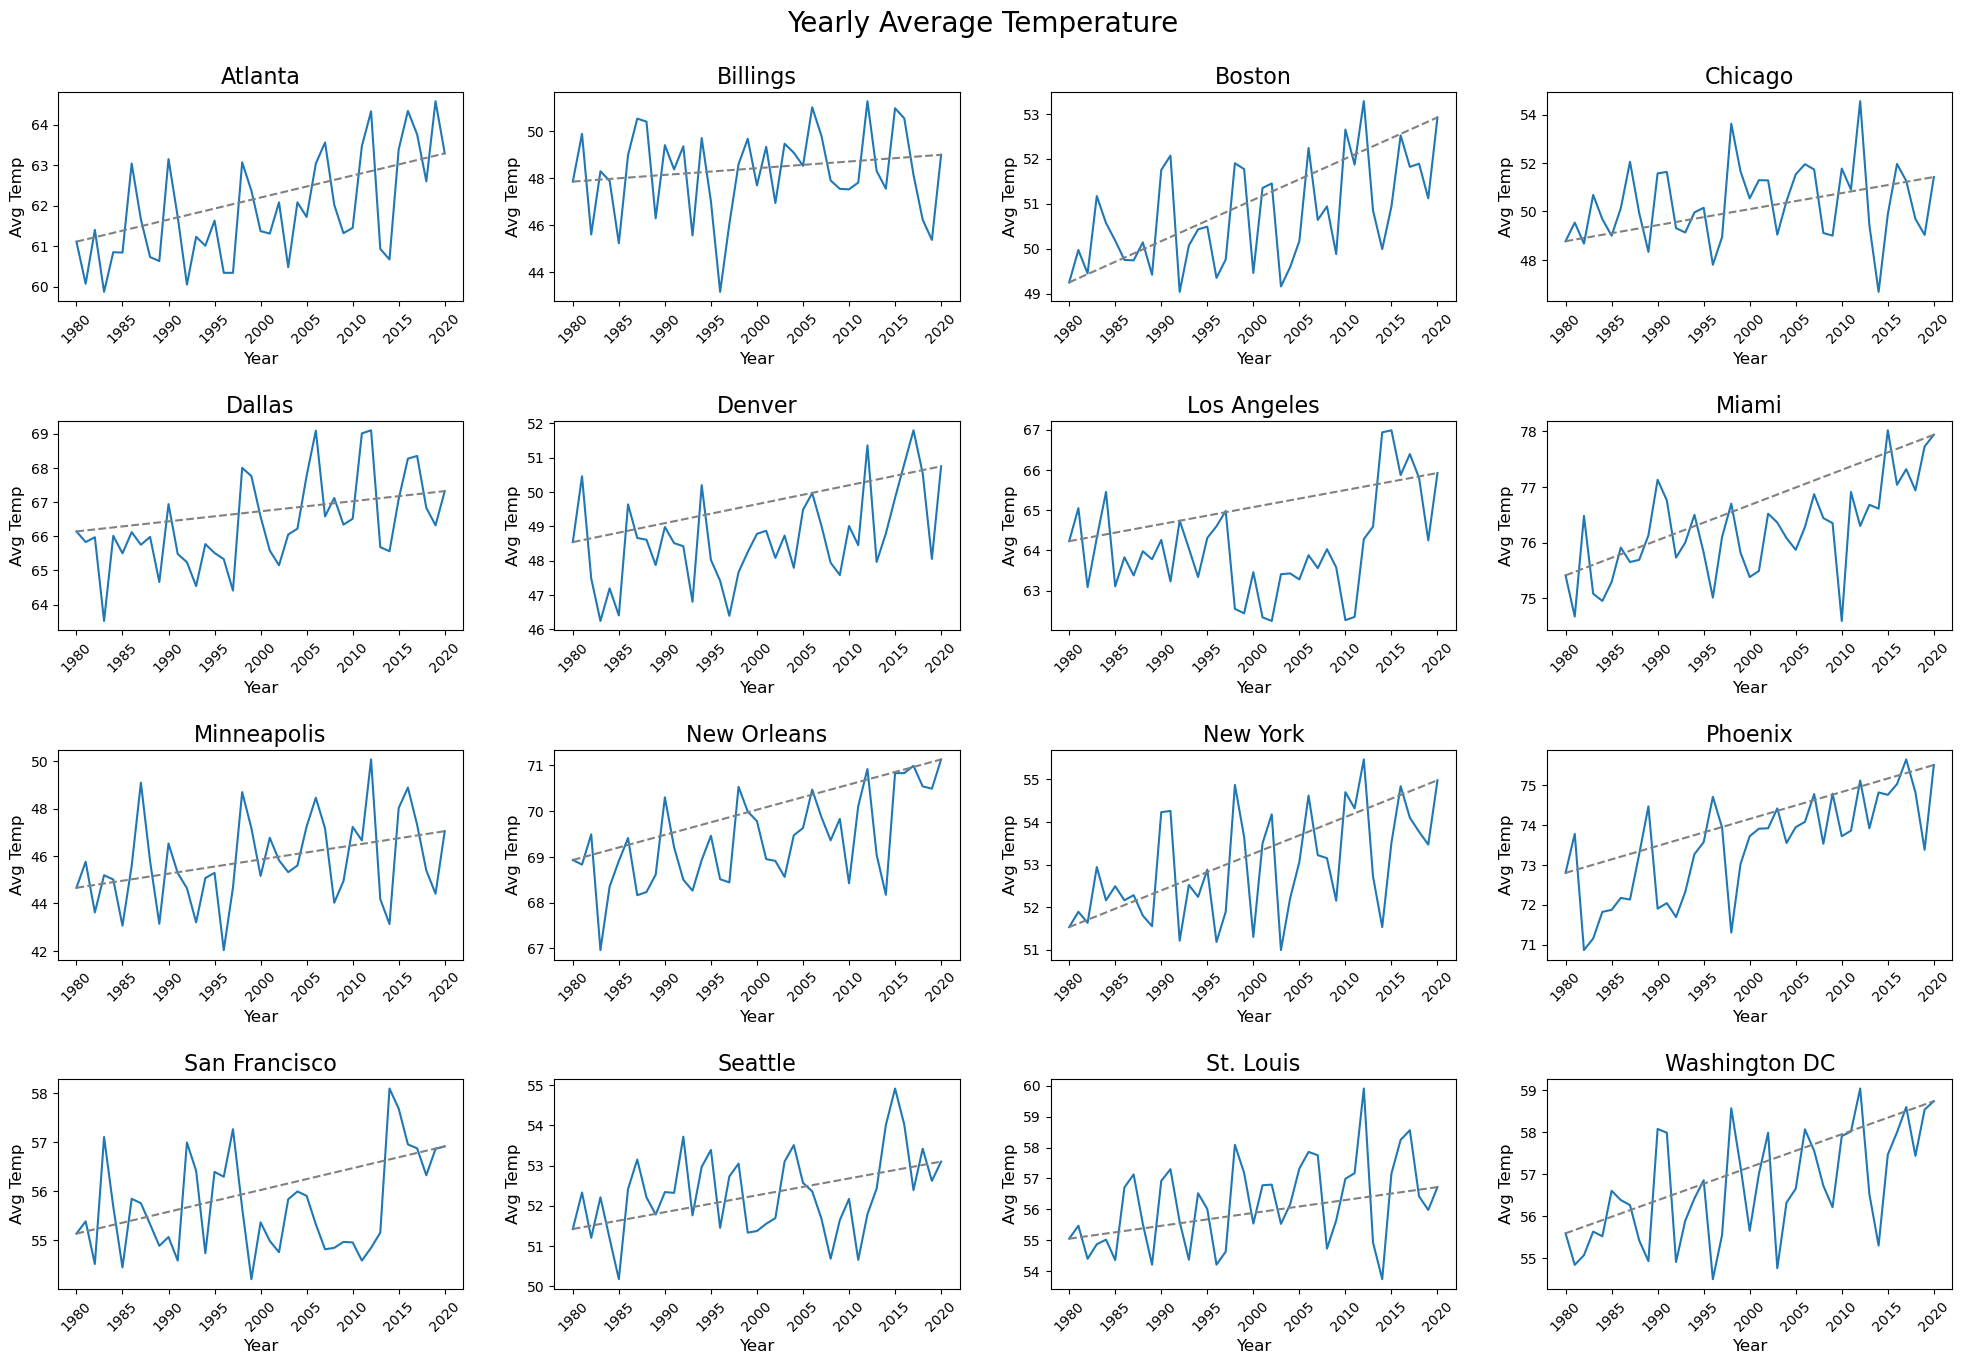

In [8]:
plot_yearly(df_city_agg, 'Avg Temp', 'Yearly Average Temperature')

### Yearly precipitation

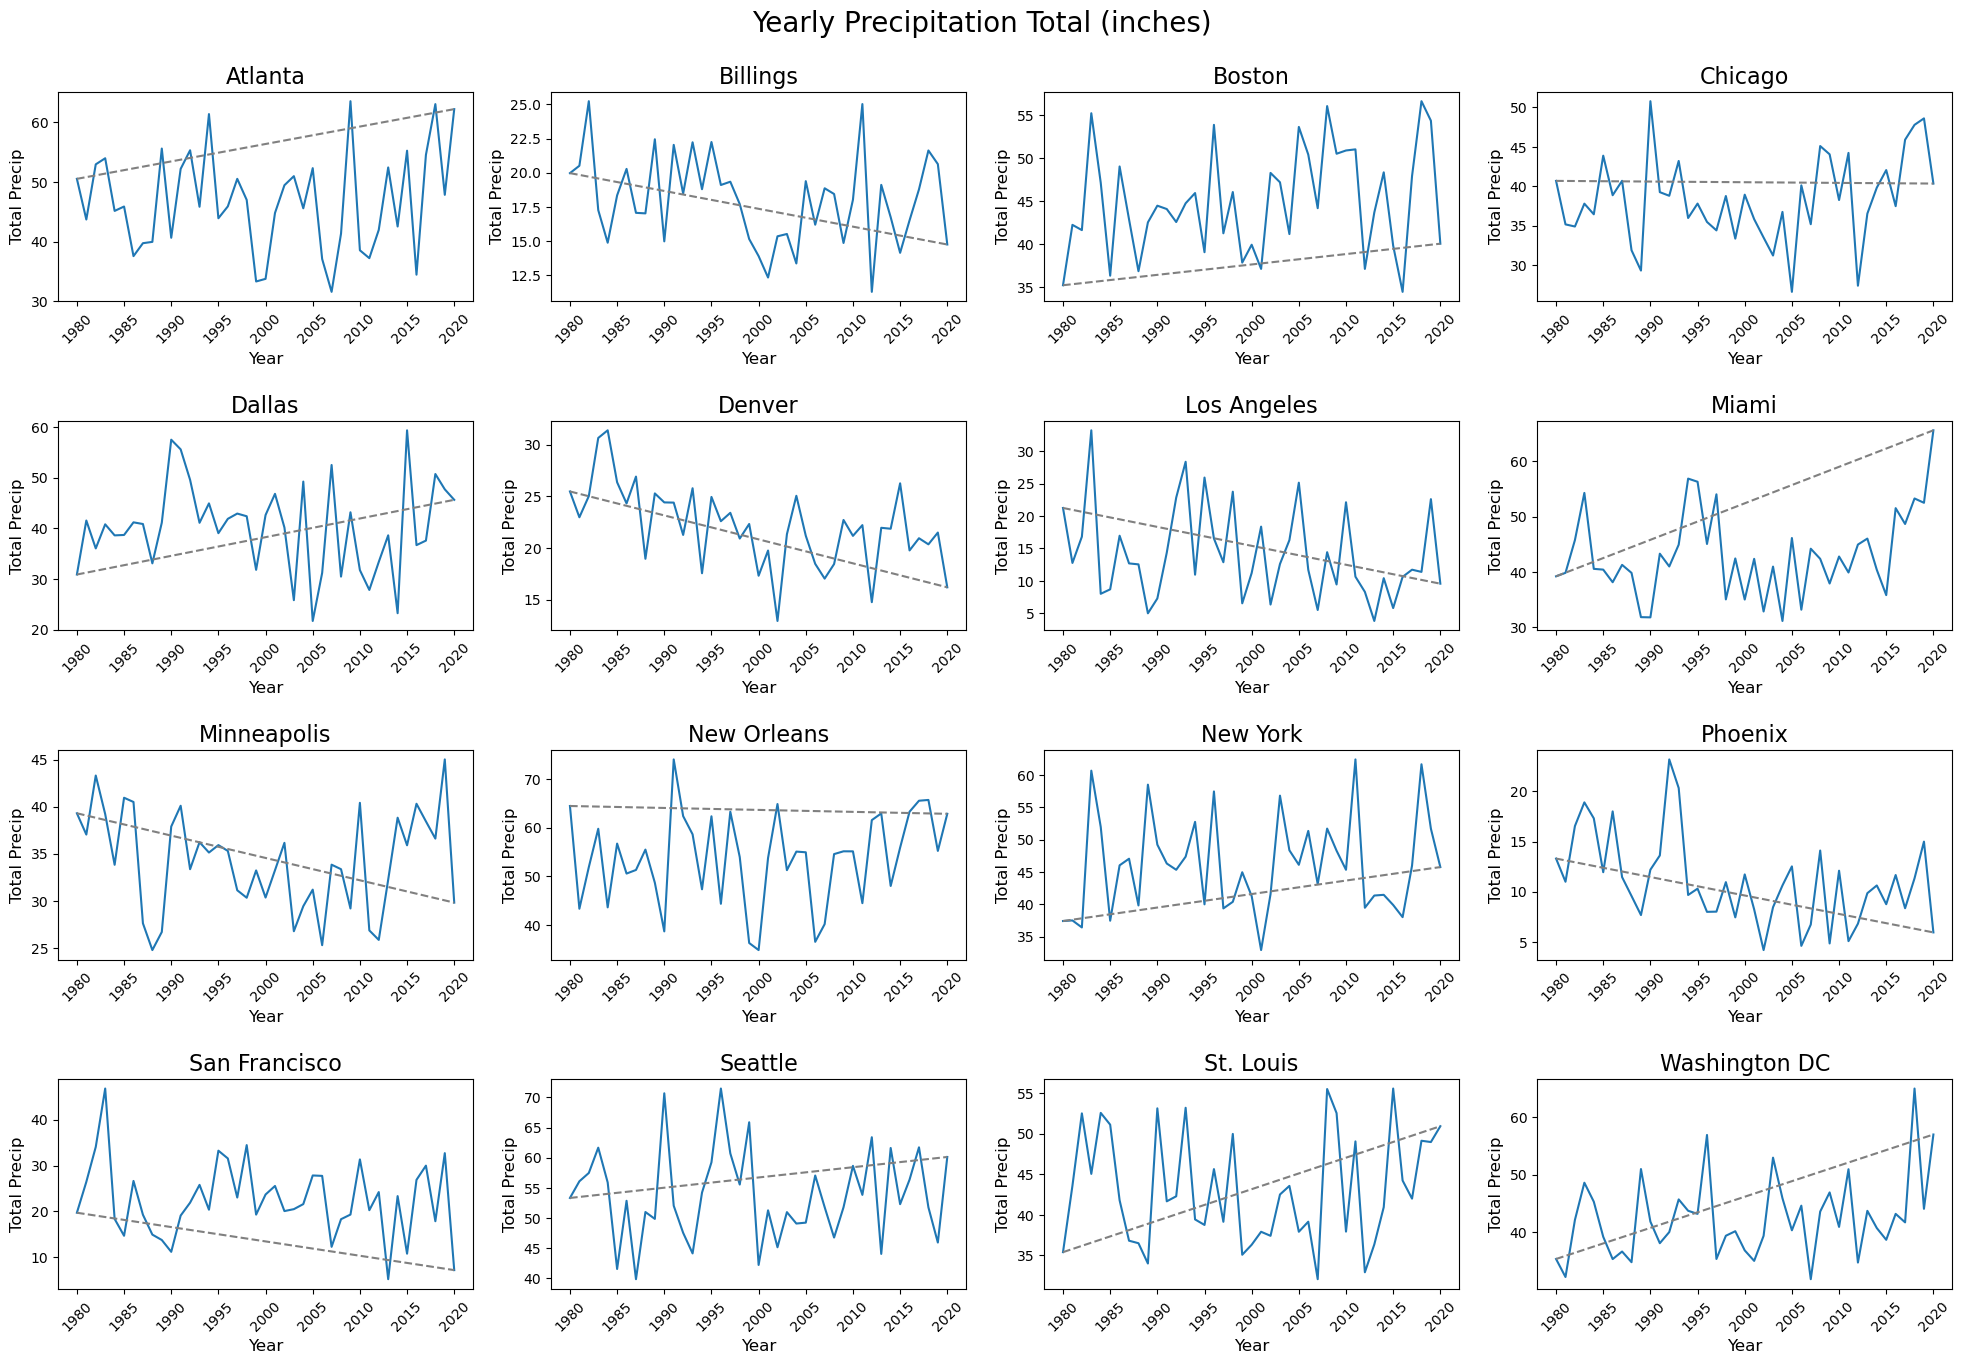

In [9]:
plot_yearly(df_city_agg, 'Total Precip', 'Yearly Precipitation Total (inches)')

### Yearly average humidity

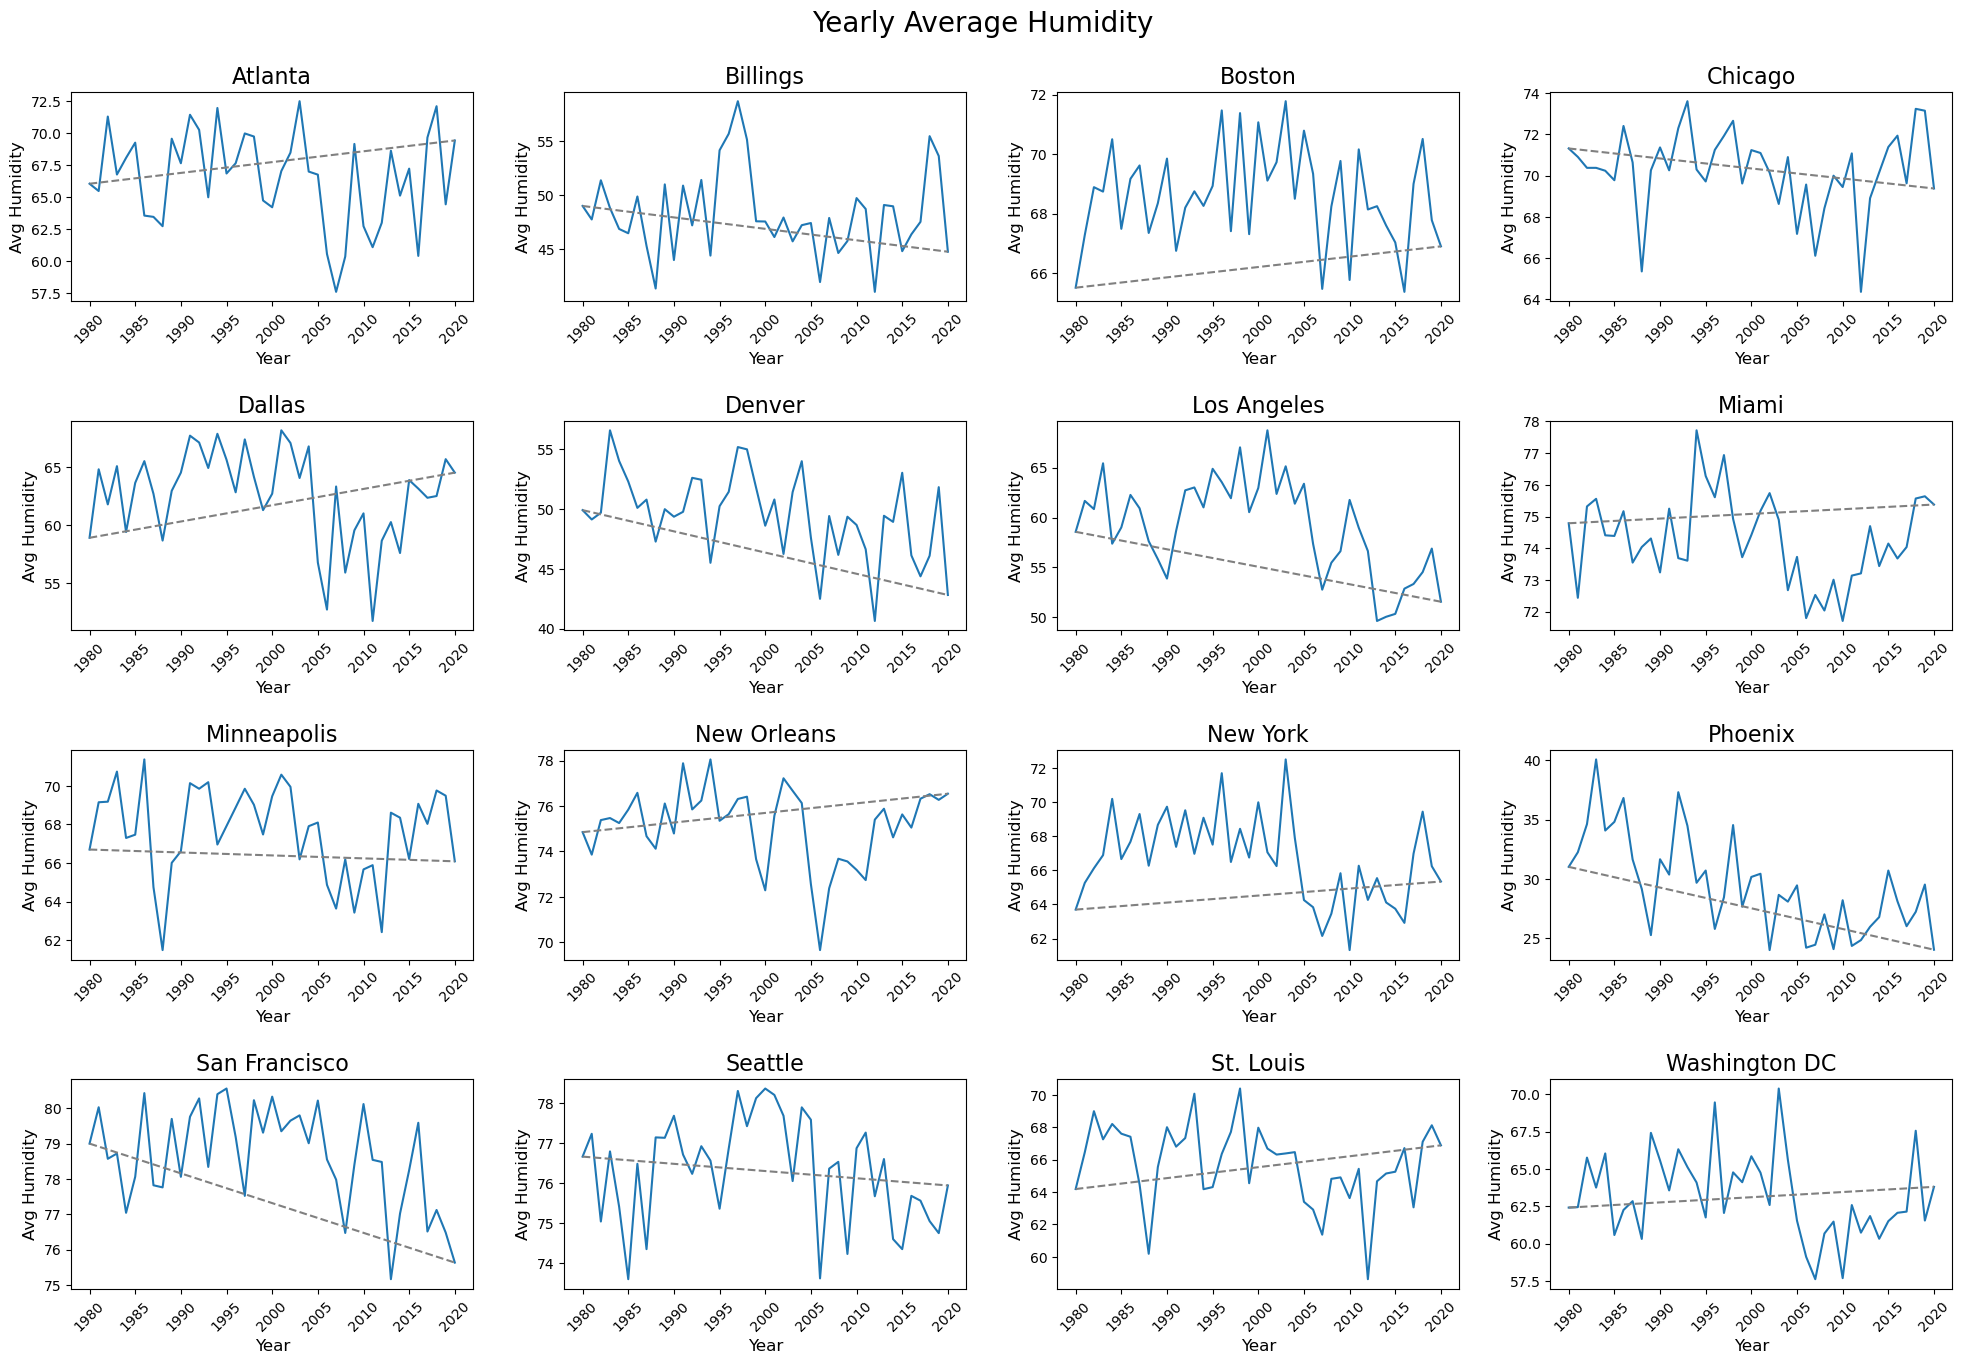

In [10]:
plot_yearly(df_city_agg, 'Avg Humidity', 'Yearly Average Humidity')

#### Function that will plot several observations of interest

In [11]:
def show_lineplot(df_city, ax, y, title, city):
    df_city = df_city[df_city['City']==city]
    ax = sns.lineplot(data=df_city, x="Year", y=y, ci=None, ax=ax)
    
    # Plot trend
    y_first = df_city.iloc[0][y]
    x_first = df_city.iloc[0]['Year']
    y_last = df_city.iloc[-1][y]
    x_last = df_city.iloc[-1]['Year']
    ax = sns.lineplot([x_first, x_last], [y_first, y_last], linestyle='--', color='gray', ax=ax)
    
    ax.set_title(title, fontsize=subtitle_size)
    ax.tick_params(axis='x', rotation=30)
    ax.set_ylabel("Days", fontsize=x_y_label_size)
    ax.set_xlabel("Year", fontsize=x_y_label_size)

        
def plotCounts(obs, levels, obs_col, suptitle, lt=False):
    city_list = []
    for city in cities:
        df_city = df_city_daily_obs[df_city_daily_obs['City']==city]
        for year in range(1980, 2021):
            row = []
            row.append(year)
            row.append(city)
            for idx, level in enumerate(levels):
                if lt:
                    temp_filter = (df_city['Date'].dt.year == year) & (df_city[obs_col] <= level)
                else:
                    temp_filter = (df_city['Date'].dt.year == year) & (df_city[obs_col] >= level)
                row.append(df_city[temp_filter].shape[0])
            city_list.append(row)

    # Create data frame
    cols = []
    cols.append('Year')
    cols.append('City')
    for col in obs:
        cols.append(col)
    df_city = pd.DataFrame(columns=cols, data=city_list)
    
    fig, ax = plt.subplots(4, 4, figsize=fig_size)
    row, col = 0, 0
    for city in cities:
        if col > 3:
            row += 1
            col = 0
        for idx, val in enumerate(obs):
            show_lineplot(df_city, ax[row][col], val, f'{city}', city)
        col += 1

    fig.suptitle(suptitle, fontsize=title_size)
    fig.tight_layout(pad=pad_space)
    plt.show()

### Yearly high-heat days

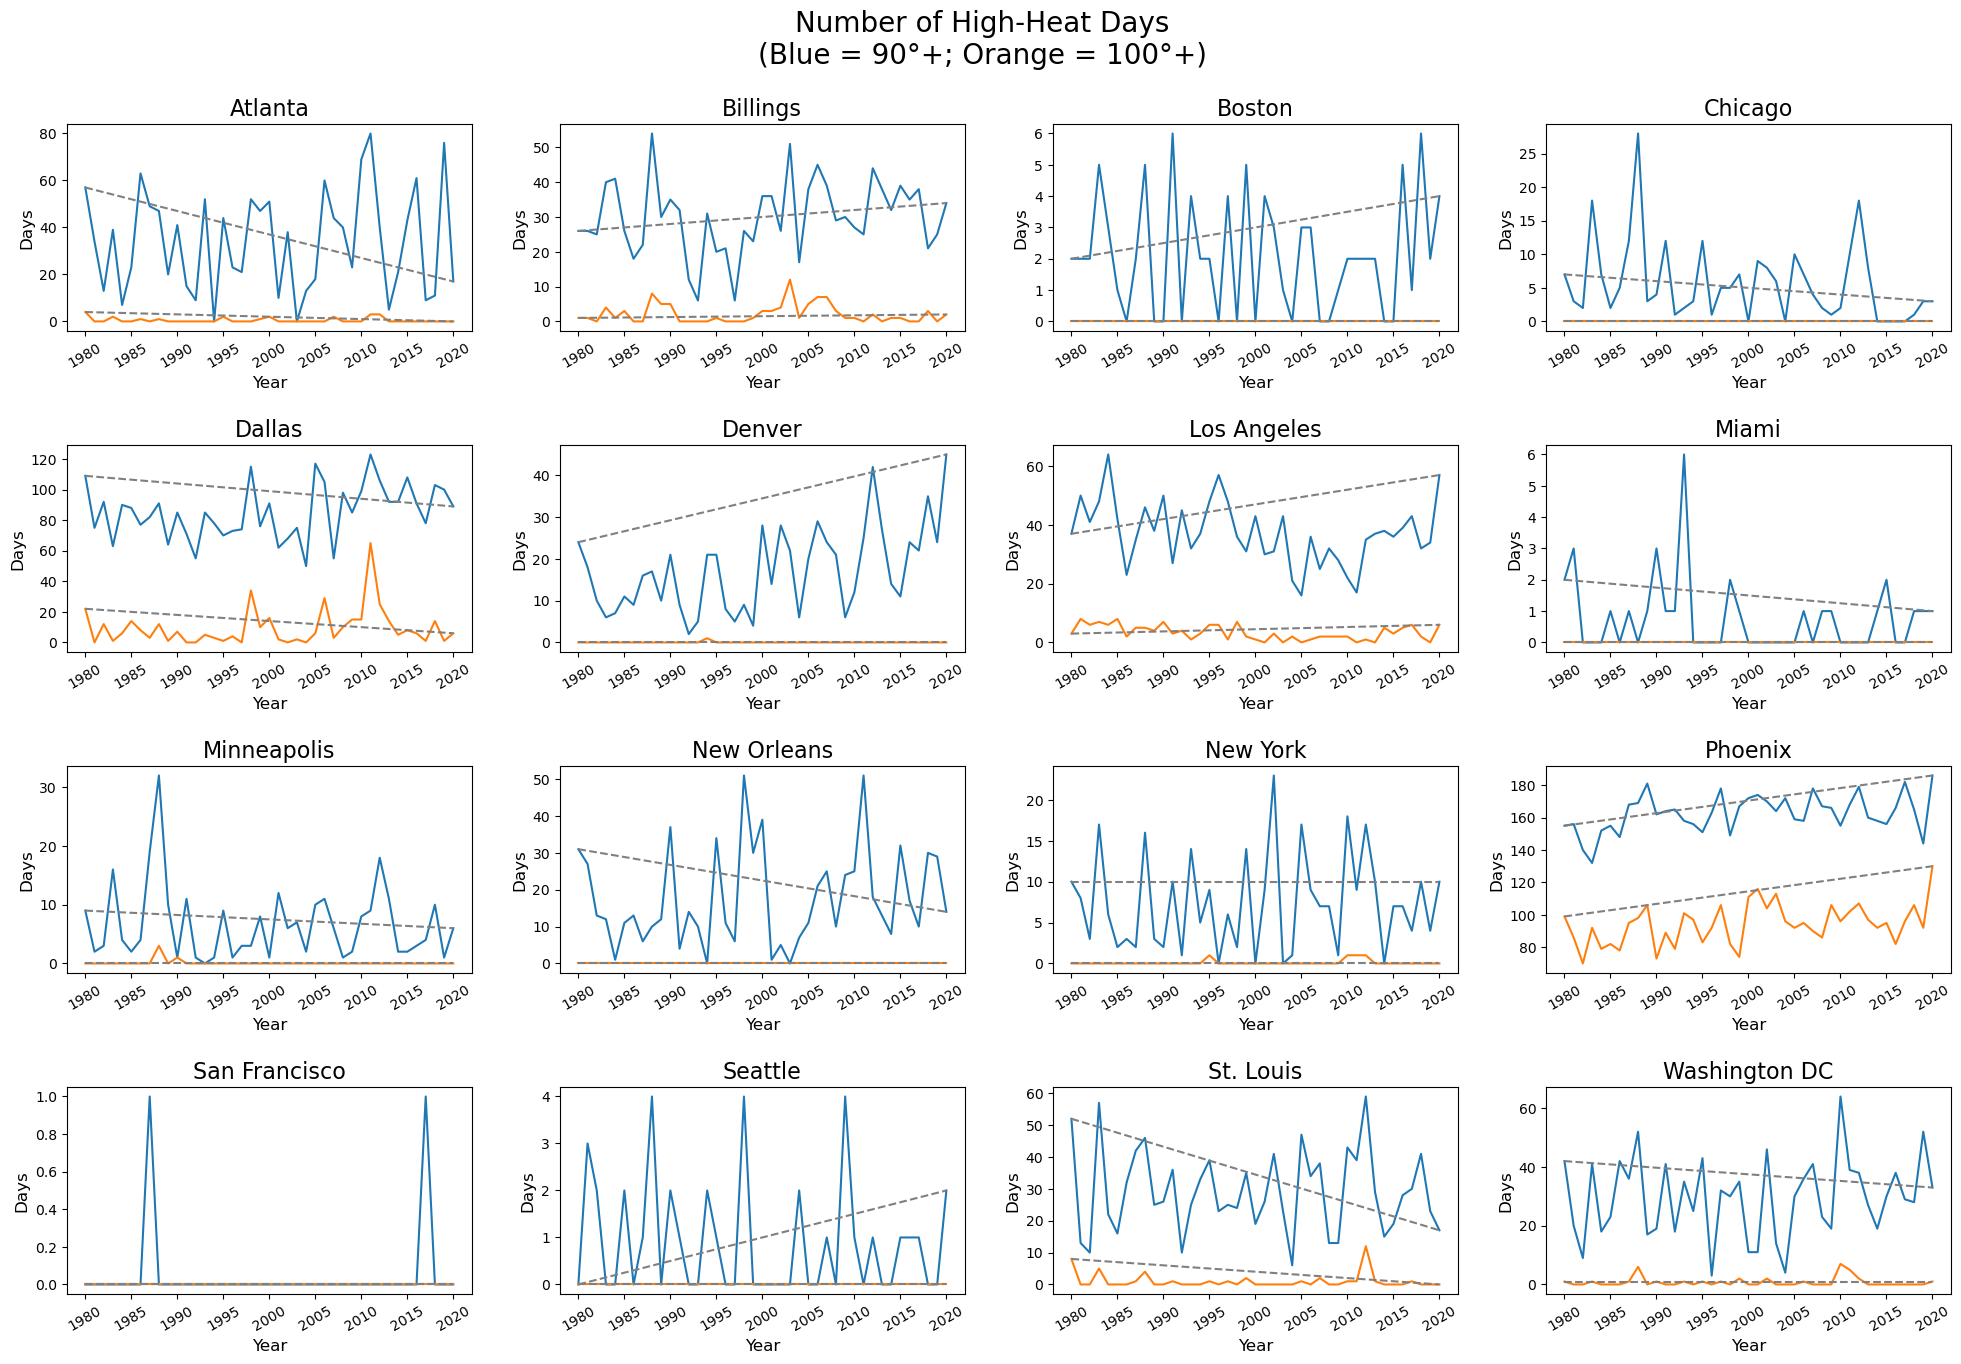

In [12]:
plotCounts(['90+ Days', '100+ Days'], [90, 100], 'High', \
           'Number of High-Heat Days\n(Blue = 90°+; Orange = 100°+)')

### Yearly days below freezing

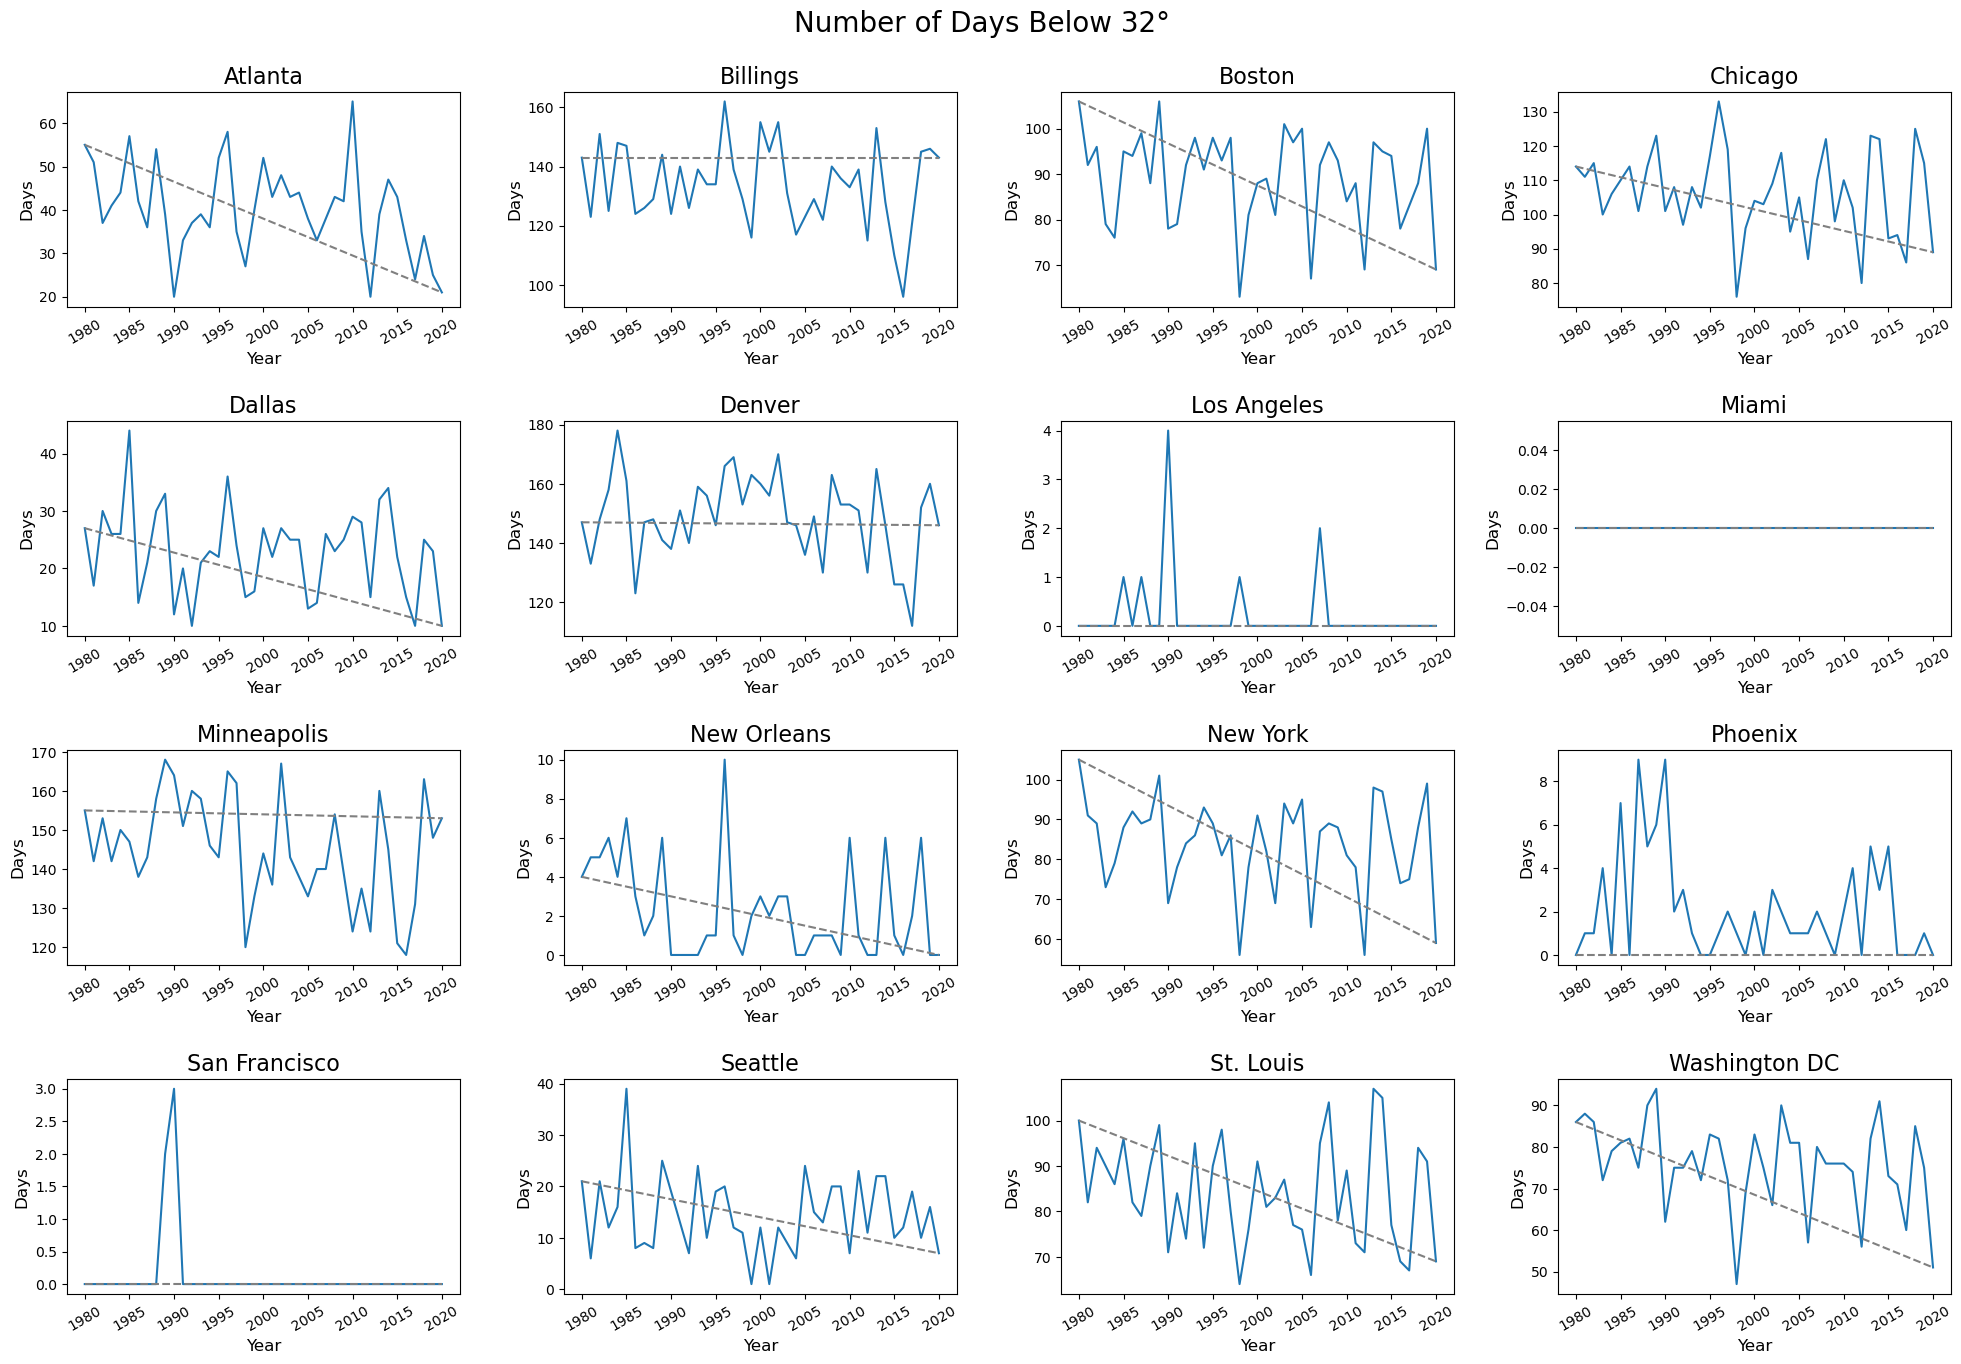

In [13]:
plotCounts(['<32°'], [32], 'Low', 'Number of Days Below 32°', True)

### Yearly days with precipitation

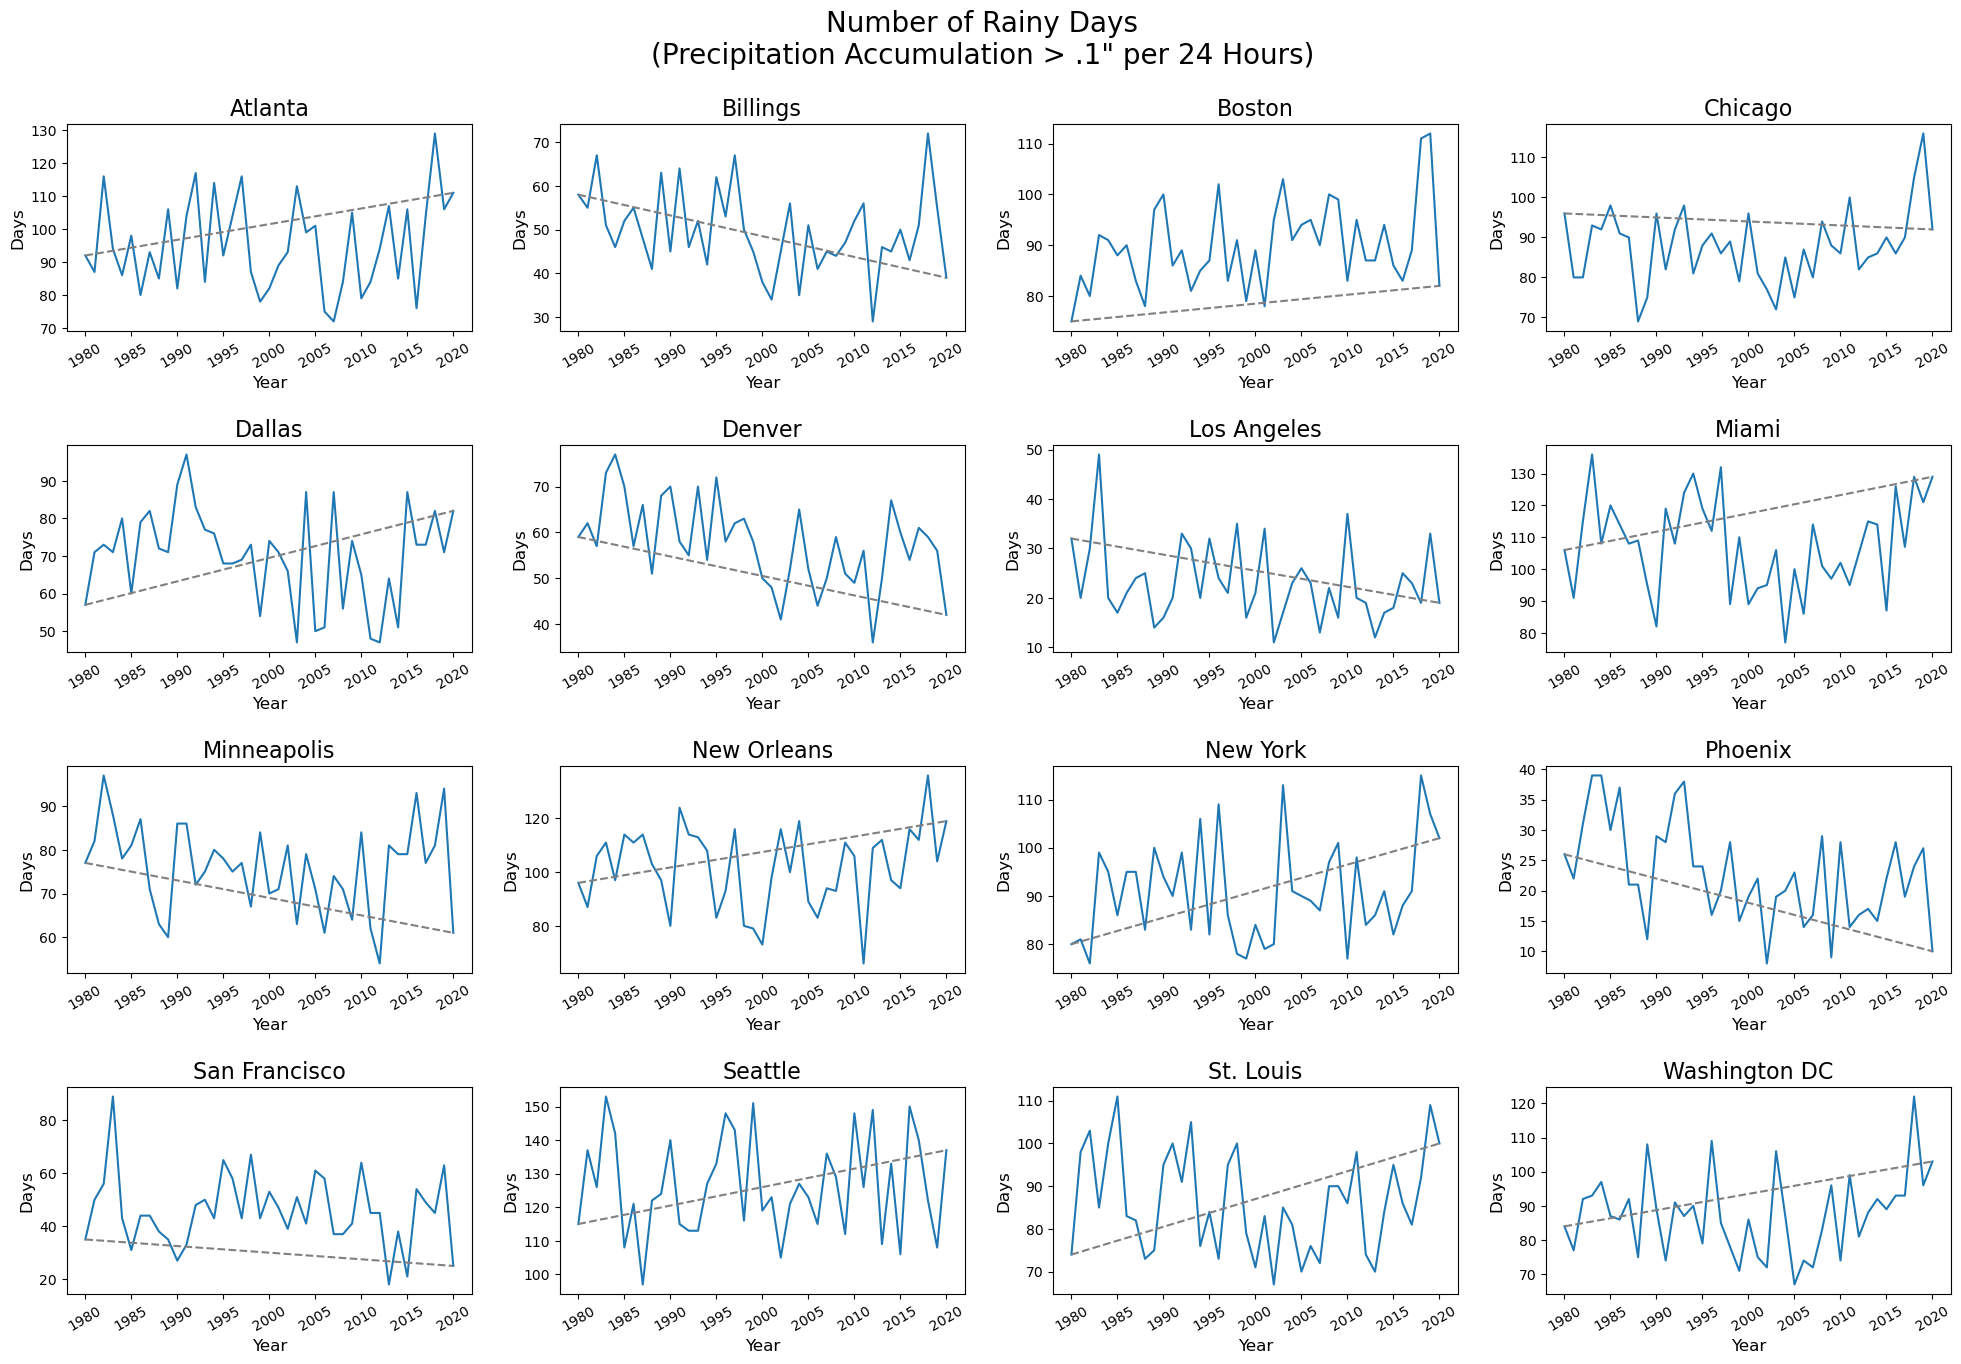

In [14]:
plotCounts(['>.1"'], [.1], '24 Hour Precip', \
                     'Number of Rainy Days\n(Precipitation Accumulation > .1" per 24 Hours)')

## Dataset visualizations summary
<table>
    <tr><th style="text-align: left; font-size: 14px;">Average Temperature</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">As expected, with the scientific findings during the past few decades, we see an overall trend in average temperatures. The temperatures are the average of every hourly reading throughout the year. This chart shows a nice disparity among the cities that we hoped to show, as seen by the y-axis values. The similarities between cities is not completely clear in these charts, but further analysis can answer those questions. In particular, Phoenix seems to be getting hottest based on its plot; Miami also shows this trend. Perhaps the warmer climates are getting warmer. Washington DC and New York have similar values as we would expect being only a few hundred miles apart. New Orleans on the Gulf of Mexico coast seems to be increasing, while San Francisco remains fairly consistent.</td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Yearly Precipitation</th></tr>
    <tr><td style="text-align: left; font-size: 14px;"><p>Precipitation is plotted in the same manner as temperatures. We can feel comfortable with the results as Seattle infamously ranks with the most rainfall while Phoenix comes in with the least amount of rainfall per year. The y-axis values, as well as the city extremes table, give us the range in inches. All three possibilities (more|less|same) seem to be observed among the cities.</p><p>Some cities, like Los Angeles, seem to have its average drop. Miami and New Orleans appear to have an uptick in precipitation per year. Just like the temperatures, there could be similarities among cities that can be discovered in similarity matrices. These graphs show overall trends over the years. Are more refined comparison might highlight where those similarities occur. Perhaps weather patterns have changed in certain regions due to climate change.</p></td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Yearly average humidity</th></tr>
    <tr><td style="text-align: left; font-size: 14px;"><p>As water vapor is one of the three ingredients that compose weather, average yearly humidity was plotted in the same spirit as temperatures and precipitation. If there is an uptick in any area, the heat can feel more uncomfortable. The U.S. southeast appears to be getting more humid, while the U.S. southwest is getting drier. Though out of scope for this project, these are two key fuels for tornadoes in the US<a href='https://apnews.com/article/tornadoes-climate-change-supercells-mississippi-disaster-dc7e22dd4d2173543463f4e4df4da076'><sup>4</sup></a>.</p><p>Humidity is also strong fuel for hurricanes<a href='https://www.nasa.gov/feature/esnt/2022/five-questions-to-understand-hurricanes-climate-change'><sup>5</sup></a>. Unfortunately, the trends seen in Miami and New Orleans could mean stronger hurricanes in the region. Though again outside the scope of this project, similarity matrices and time series analysis could confirm a correlation between Miami and New Orleans.</p></td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Yearly high-heat days</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">One of the most noticeable, and perhaps signaling aspects of climate change, are hot days. A 100° day in Phoenix shouldn't raise any alarms. Seattle or San Francisco on the other hand would be quite rare. A hot day here and there is typical for meteorological standard deviations. An increase in the amount of days with extreme heat (for some cities) is displayed here. Denver seems to show the strongest trend among the cities. We would like to show which other cities are similar.</td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Yearly days below freezing</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">As mentioned in the summary, some areas could experience colder temperatures or longer cold snaps due to climate change. We would expect to see less days below 32° (chosen because water freezes at this temperature, causing different precipitation and possible hazardous travel conditions). At first glance, it appears the trends are stationary. Perhaps taking seasonality into consideration, we could see more extremes at certain times of the year. For example, colder temps could occur later in autumn/winter and less as spring arrives. But the days per year remain consistent because the winters are colder, though shorter.</td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Yearly days with precipitation</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">Rain is a product of the three ingredients in weather. These plots display actual results of a changing climate. It appears the U.S. East Coast receives more rain, while the U.S. southwest receives less rain. These observations give good cause to run similarity and time series analysis.</td></tr>
</table>

# Analysis

#### Compute mean table for each city (1980 - 2000)
This table will contain the daily mean temperature. By subtracting the values from years 2001 - 2021, we can generate a matrix of values that deviate from the mean. This will be the first similarity performed across the cities

In [15]:
%%time
df_first_half = df_city_daily_obs[df_city_daily_obs['Date'] < '2001']
days_observed = sorted(set(zip(df_first_half['Date'].dt.month, df_first_half['Date'].dt.day)))

city_day_avg = []
for city in cities:
    df_city = df_first_half[df_first_half['City']==city][['Date', 'High', 'Low']]
    df_city['Month'] = df_city['Date'].dt.month
    df_city['Day'] = df_city['Date'].dt.day
    
    for month, day in days_observed:
        day_of_year = str(str(month) + '-' + str(day))
        city_time_filter = (df_city['Month'] == month) & (df_city['Day'] == day)
        df_filtered = df_city[city_time_filter]
        avg_high = round(np.mean(df_filtered['High']), 2)
        avg_low = round(np.mean(df_filtered['Low']), 2)
        city_day_avg.append([day_of_year, city, avg_high, avg_low])

df_city_day_avg = pd.DataFrame(columns=['Day of Year', 'City', 'Avg High', 'Avg Low'], data=city_day_avg)
df_city_day_avg.shape

Wall time: 3.02 s


(5856, 4)

## Show daily averages over 20 years

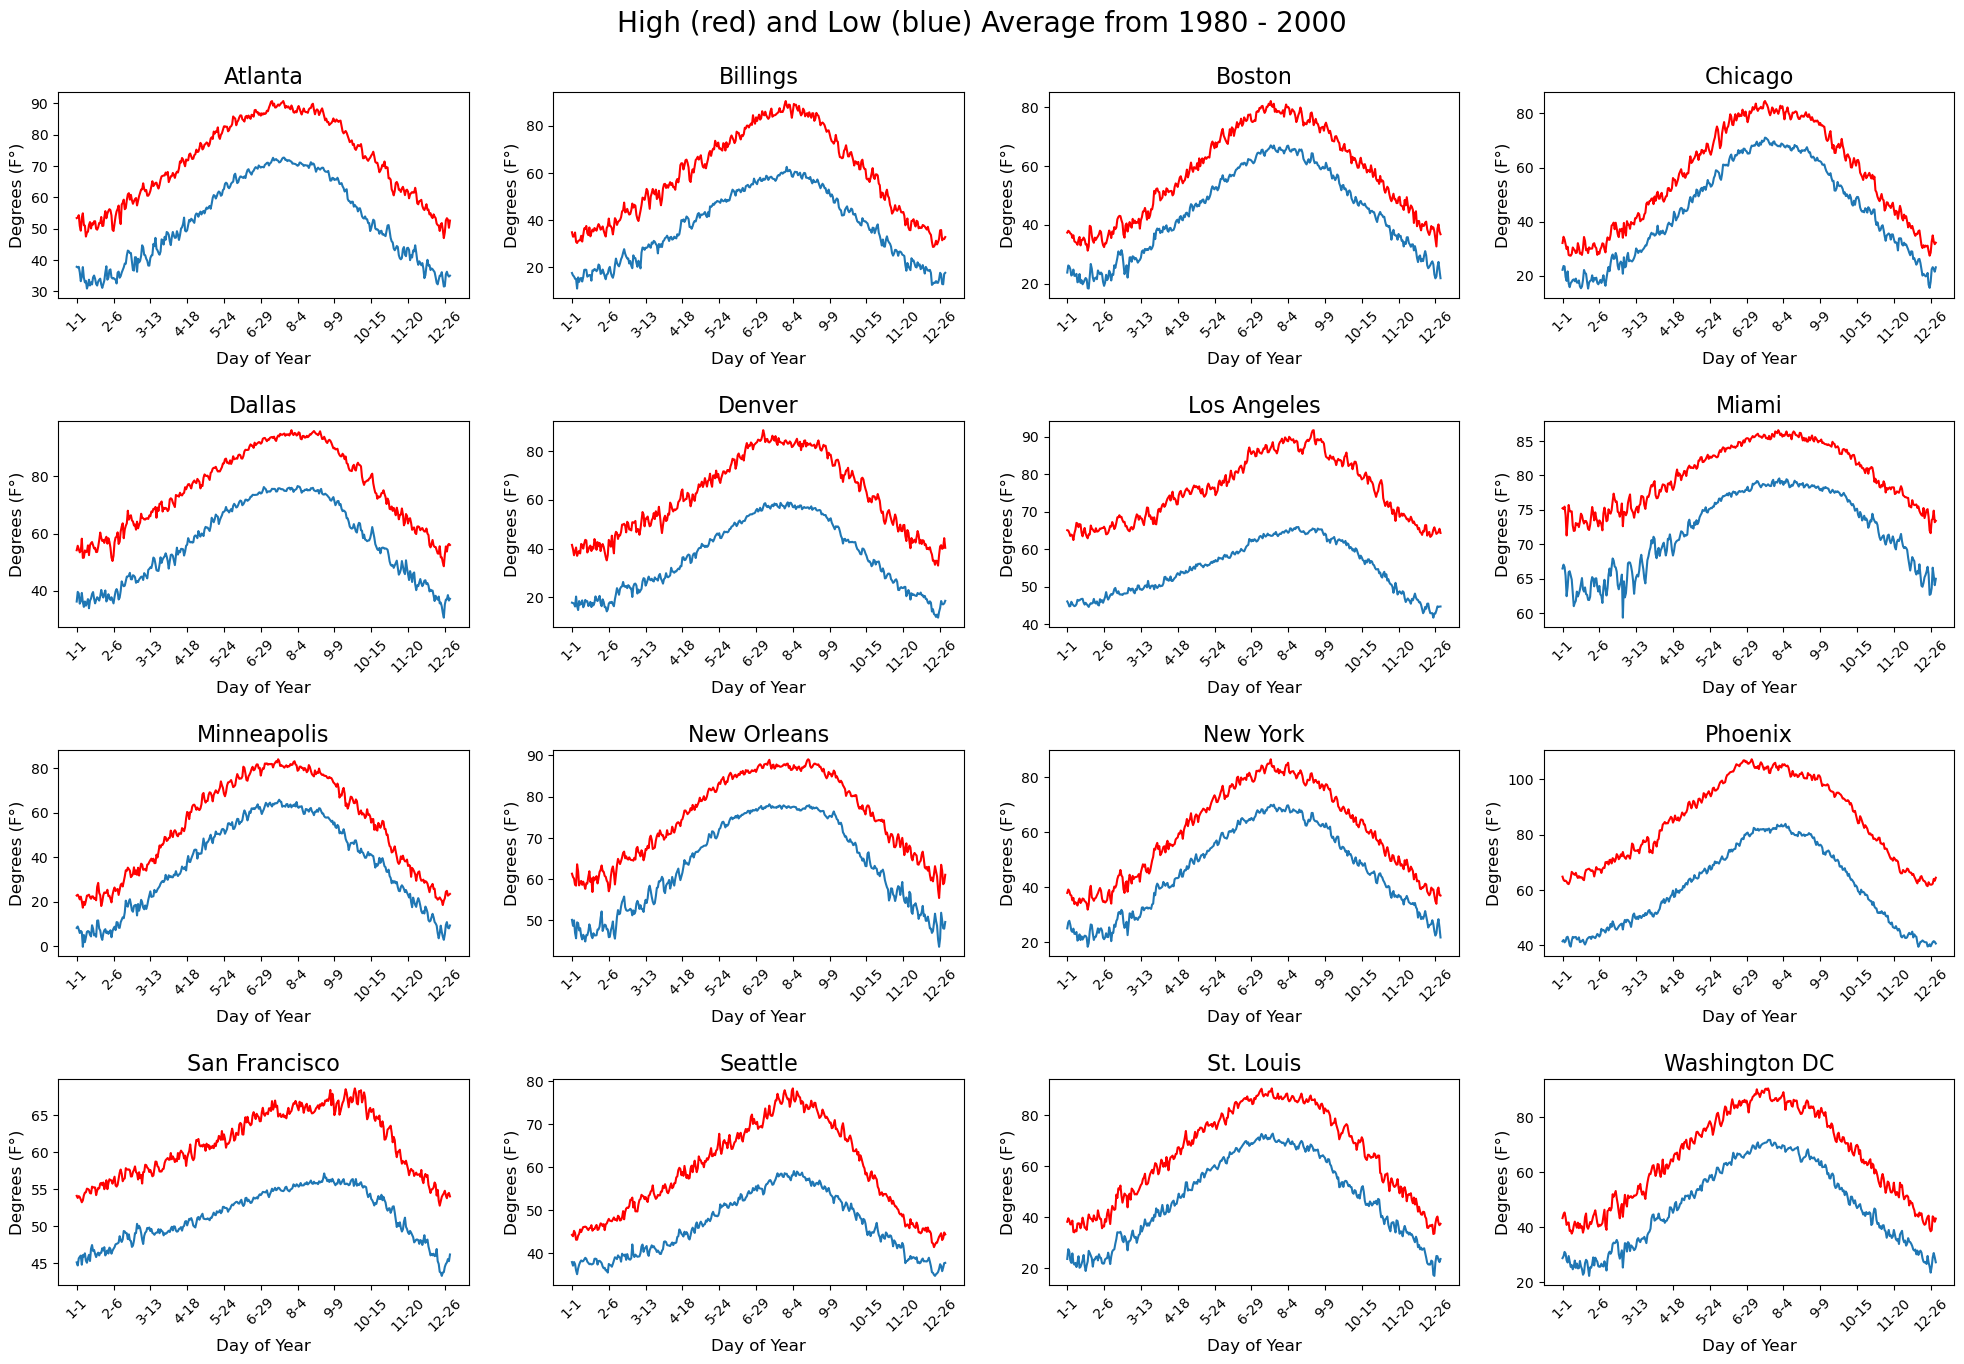

In [16]:
fig, ax = plt.subplots(4, 4, figsize=fig_size)
row, col = 0, 0
for city in cities:
    if col > 3:
        row += 1
        col = 0

    ax[row][col] = sns.lineplot(data=df_city_day_avg[df_city_day_avg['City']==city], \
                                x="Day of Year", y='Avg Low', ci=None, ax=ax[row][col])  
    ax[row][col] = sns.lineplot(data=df_city_day_avg[df_city_day_avg['City']==city], \
                                x="Day of Year", y='Avg High', color='red', ci=None, ax=ax[row][col])
    ax[row][col].set_ylabel('Degrees (F°)', fontsize=x_y_label_size)
    ax[row][col].tick_params(axis='x', rotation=45)
    ax[row][col].set_xticks(np.arange(0, 366, 36))
    ax[row][col].set_xlabel('Day of Year', fontsize=x_y_label_size)
    ax[row][col].set_title(f'{city}', fontsize=subtitle_size)
    col += 1
    
fig.suptitle('High (red) and Low (blue) Average from 1980 - 2000', fontsize=title_size)
fig.tight_layout(pad=pad_space)
plt.show()

## Daily averages over 20 years summary
These plots show the average temperature from 1980 to 2000 for all sixteen cities. A few things have been confirmed here:
- Each city experiences seasonality, though the temperature ranges vary among the cities (see standard deviation explanation)
- High temperatures and low temperatures behave the same. Either can be explored for climate change's effect on temperature.
- All cities being the Northern Hemisphere, the warmest temperatures are June-September and coldest temperature December-March.

## Jaccard similarity

#### Matrix for temperature departure from average
Build a matrix of daily temperatures per city as they deviate from the daily mean computed from the previous 20 years.

In [17]:
%%time

# Initialize data frame
cols = ['Location:Type']
df = df_city_daily_obs[df_city_daily_obs['Date'].dt.year > 2000]
df = df.astype({'Date': str}) # Convert Date to string
cols.extend(np.unique(df['Date']))
df_city_day_dev = pd.DataFrame(columns=cols)

row_count = 0
for city in cities:
    # Get averages for each city
    df_city = df_city_day_avg[df_city_day_avg['City']==city]
    
    # Get daily observations from the high/lows data frame after year 2000
    city_time_filter = (df_city_daily_obs['City']==city) & (df_city_daily_obs['Date'].dt.year > 2000)
    df_second_half = df_city_daily_obs[city_time_filter]
    
    # Add month and day columns for filtering to work more efficiently
    df_second_half['Month'] = df_second_half['Date'].dt.month
    df_second_half['Day'] = df_second_half['Date'].dt.day

    high_dev, low_dev = [], []
    high_dev.append(f'{city}:High')
    low_dev.append(f'{city}:Low')
    for month, day in days_observed:
        day_of_year = str(str(month) + '-' + str(day))
        
        # Get daily observations for day of year after 2000
        city_time_filter = (df_second_half['Month'] == month) & (df_second_half['Day'] == day)
        
        # Get average high/low for that day
        avg_high = df_city[df_city['Day of Year']==day_of_year]['Avg High'].item()
        avg_low = df_city[df_city['Day of Year']==day_of_year]['Avg Low'].item()
        
        # Find devation from daily average
        df_filtered = df_second_half[city_time_filter]
        for idx, row in df_filtered.iterrows():
            high_dev.append(round(avg_high - row['High'], 2))
            low_dev.append(avg_low - row['Low'])

    df_city_day_dev.loc[row_count] = high_dev
    df_city_day_dev.loc[row_count + 1] = low_dev
    row_count += 2

df_city_day_dev.set_index('Location:Type', inplace=True)
print(f'Size of daily deviation matrix: {df_city_day_dev.shape}')

Size of daily deviation matrix: (32, 7670)
Wall time: 23.6 s


### Temperature similarity

Top 20 Similarites of Cities (High)

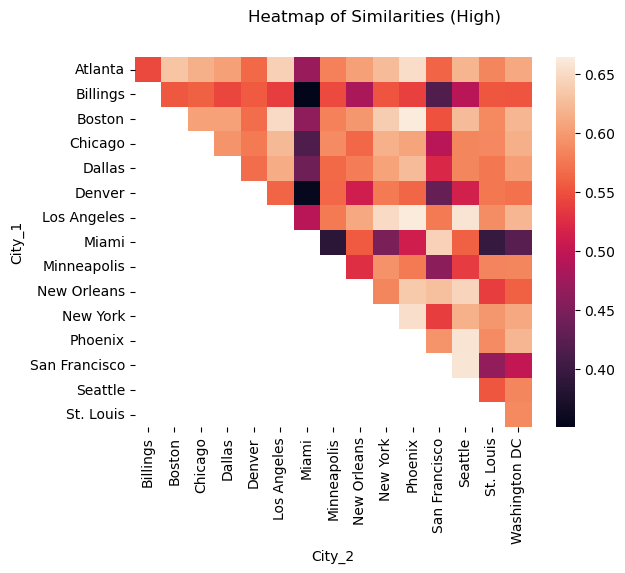

Top 20 Similarites of Cities (Low)

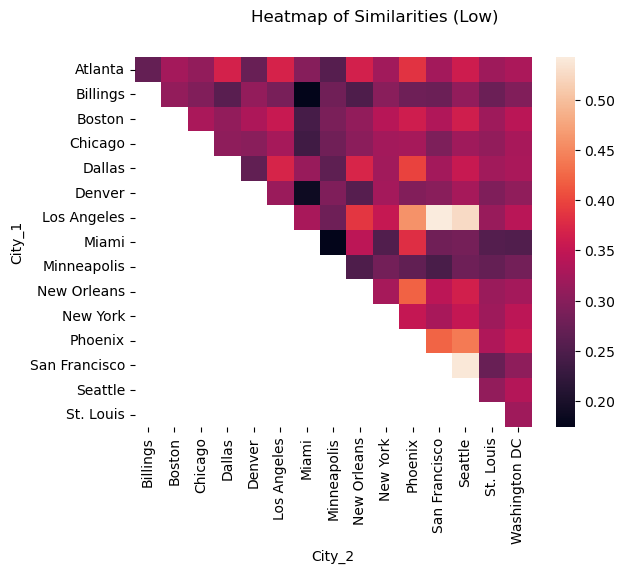

Number of Unique Temperatures Each City's Set:


Wall time: 1.29 s


In [18]:
%%time
"""
Lesson 03: Locality Sensitivity Hashing
Copyright 2021, 2022, 2023, Stephen F. Elston. All rights reserved.
"""
def plot_jaccard_similarities(jaccard_similarities, title):
    df = pd.DataFrame(columns=['City_1', 'City_2', 'Score'])
    for idx, key in enumerate(jaccard_similarities.keys()):
        city_1, city_2 = key
        score = jaccard_similarities[key]
        df.loc[idx] = [city_1, city_2, score]

    df = df.pivot("City_1", "City_2", "Score")
    sns.heatmap(df)
    print('\n')
    plt.suptitle(title, fontsize=x_y_label_size)
    plt.show()
    
    
def compute_jaccard_similarity(city_1_set, city_2_set):
    return len(city_1_set.intersection(city_2_set)) / len(city_1_set.union(city_2_set))


def create_jaccard_table(temp_type='High'):
    pair_labels = []
    pair_sims = []
    for city_1, city_2 in itertools.combinations(cities, 2):
        pair_labels.append((city_1, city_2))
        city_1_temps = set(df_city_day_dev.loc[f'{city_1}:{temp_type}'])
        city_2_temps = set(df_city_day_dev.loc[f'{city_2}:{temp_type}'])
        pair_sims.append(compute_jaccard_similarity(city_1_temps, city_2_temps))

    scores = {}
    for pair, score in zip(pair_labels, pair_sims):
        scores[pair] = round(score, 3)

    # Order by key descending
    scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
    formatted_title = f'Top 20 Similarites of Cities ({temp_type})'
    pretty_df(formatted_title, scores, ['Cities', 'Score'], 8, 5)
    
    plot_jaccard_similarities(scores, f'Heatmap of Similarities ({temp_type})')
    
create_jaccard_table()
create_jaccard_table('Low')
set_lengths = {}
for city in cities:
    df_filter = city + ':High'
    set_lengths[df_filter.replace(':','(') + ')'] = len(set(df_city_day_dev.loc[df_filter]))
    df_filter = city + ':Low'
    set_lengths[df_filter.replace(':','(') + ')'] = len(set(df_city_day_dev.loc[df_filter]))

pretty_df("Number of Unique Temperatures Each City's Set:\n", set_lengths, ['City', 'Set Count'], 8)

## Jaccard similarity summary
At first glance, this seems like a reasonable comparison chart. For highs, the second and fifth most similar cities are Boston and Phoenix, then Los Angeles and Seattle: each city pairing have diverse climates. The Jaccard similarity looked for cities with common departures from the mean for each day from 2001 to 2021. The climates do not have to be similar, it instead looks at which cities are like each other in terms of departure from the norm most frequently. The lows had much lower similarity scores. Again, Phoenix was near the top of scores matched among all cities, while Miami scored lowest. The general pattern between highs and lows remains similar, but the highs had better scores. Not sure how to interpret this phenomenon. It could just be that each city has a different scale for low temperature deviation from average.

Jaccard similarity will not be the best analytical tool for this dataset. The issue lies with the vector organization fed into the Jaccard algorithm. For the algorithm to work, the data must be in a set (unique values). This is so the union and intersection can be computed. Once a number is duplicated, e.g. 1.2, it is not added to the set because it already exists. So we lose valuable information if two cities frequently deviate from the norm in a certain temperature range. If two cities float between -3° and 3° around the mean for that day in the year, that exact number (precision of two) will only appear once in each city's set. In essence, the deviation is captured in the set for each city, but not the frequency. This could be valuable information. Instead, the cities look quite similar in how often they deviate from their respective mean because multiple exact readings are captured just once.

Regarding both highs and lows, Miami ranks close to the bottom of similarities to other cities, while Phoenix is near the top. This is an interesting phenomenon. We know from the previous plots that Miami does not fluctuate that much in temperatures - large swings from the mean would be very rare. Phoenix must have large swings from the mean that compare to other cities that behaved the same - though the compared climates are disparate. We can confirm by comparing the standard deviation of Phoenix to the other similar cities. Miami and Phoenix's highs' similarity score is 0.512, which is close to the bottom of the list, but significantly higher than the lowest score of Billings and Miami highs at 0.351. On the whole, the low temperatures' sets have more fluctuation (higher number of entries per set). This could explain why the Jaccard similarity scores for low temperatures were lower than for high temperatures.

## Hamming distance

#### Encoded mean departures
Instead of continuous values for the temperature difference from the daily mean, the values will be encoded from a scale of -40 to 40 step 5. Temperature differences from mean encoded as:
<table align='left'>
    <tr>
        <th>Temperature Diff</th>
        <th>Encoded Value</th>
        <th>Temperature Diff</th>
        <th>Encoded Value</th>
        <th>Temperature Diff</th>
        <th>Encoded Value</th>
        <th>Temperature Diff</th>
        <th>Encoded Value</th>
    </tr>
    <tr --row 1-->
        <td>&lt; -40°</td>
        <td>0</td>
        <td>-20° to -15°</td>
        <td>5</td>
        <td>5° to 10°</td>
        <td>10</td>
        <td>30° to 35°</td>
        <td>15</td>        
    </tr>
    <tr --row 2-->
        <td>-40 to -35°</td>
        <td>1</td>
        <td>-15° to -10°</td>
        <td>6</td>
        <td>10° to 15°</td>
        <td>11</td>
        <td>35° to 40°</td>
        <td>16</td>        
    </tr>
    <tr --row 3-->
        <td>-35° to -30°</td>
        <td>2</td>
        <td>-10° to -5°</td>
        <td>7</td>
        <td>15° to 20°</td>
        <td>12</td>
        <td>&gt; 40°</td>
        <td>17</td>        
    </tr>
    <tr --row 4-->
        <td>-30° to -25°</td>
        <td>3</td>
        <td>-5° to 0°</td>
        <td>8</td>
        <td>20° to 25°</td>
        <td>13</td>
        <td></td>
        <td></td>
    </tr>        
    <tr --row 5-->
        <td>-25° to -20°</td>
        <td>4</td>
        <td>0° to 5°</td> 
        <td>9</td>
        <td>25° to 30°</td>
        <td>14</td>
        <td></td>        
        <td></td>        
    </tr>    
</table>
<br></br><br></br><br></br><br></br><br></br>
There will be two categories per city: High and Low. Each city value will be the index of the matrix. The encoded values allow for comparisons on categorical values rather than a large spread of continuous values.

In [19]:
%%time

def encode_list(val_list, desc):
    # Set range of temperatures
    val_range = range(-40, 45, 5)
    encoded_vals = [desc]
    
    # Select city and high/low
    for val in val_list:
        encoded_val = ''

        # Determine from which difference group the vals departure
        for idx in range(0, len(val_range)):
            if val < val_range[idx]:
                encoded_val = idx
                break
            elif val > val_range[len(val_range) - 1]:
                encoded_val = idx
                break
            elif val > val_range[idx] and val <= val_range[idx + 1]:
                encoded_val = idx
                break

        if encoded_val == '':
            raise ValueError(f'No range found for temperature difference {val}')
        
        encoded_vals.append(encoded_val)
    
    return encoded_vals

# Initialize data frame
cols = ['Location:Type']
cols.extend(df_city_day_dev.columns)
df_encoded_highs_lows = pd.DataFrame(columns=cols)

row_count = 0
for city in cities:
    
    for temp_type in ['High', 'Low']:
        # Get the daily temperature differences from the mean per city
        df_filter = f'{city}:{temp_type}'
        city_temp_vector = df_city_day_dev.loc[df_filter]
    
        # Encode the temperature differences
        df_encoded_highs_lows.loc[row_count] = encode_list(city_temp_vector, df_filter)
        
        row_count += 1

df_encoded_highs_lows.set_index('Location:Type', inplace=True)
print(f'Size of daily deviation matrix: {df_encoded_highs_lows.shape}')

Size of daily deviation matrix: (32, 7670)
Wall time: 14 s


#### Example of endoded matrix

In [20]:
df_encoded_highs_lows.head()

2001-01-01  2001-01-02  2001-01-03  2001-01-04  2001-01-05  \
Location:Type                                                               
Atlanta:High           12          10           7           5           4   
Atlanta:Low            10          11           5           9           6   
Billings:High           8          10           6           9          13   
Billings:Low            7          10           5           8          12   
Boston:High             9           8           7           6           5   

               2001-01-06  2001-01-07  2001-01-08  2001-01-09  2001-01-10  \
Location:Type                                                               
Atlanta:High            6           6           9           8           9   
Atlanta:Low             9           7           9          10           9   
Billings:High           4           8           8           8          11   
Billings:Low            5           8           7           6          10   
Boston:High             8           5           7          11           8   

               ...  2021-12-22  2021-12-23  2021-12-24  2021-12-25  \
Location:Type  ...                                                   
Atlanta:High   ...           8           9           8           6   
Atlanta:Low    ...           9           8           8           5   
Billings:High  ...           9           5          10           9   
Billings:Low   ...           8           5          10           8   
Boston:High    ...           8          10           9           6   

               2021-12-26  2021-12-27  2021-12-28  2021-12-29  2021-12-30  \
Location:Type                                                               
Atlanta:High            9          11           4           7           6   
Atlanta:Low             9           9           4           7           5   
Billings:High           8           0          11           6           5   
Billings:Low            8          15          13           6           5   
Boston:High             6          12           6           7           6   

               2021-12-31  
Location:Type              
Atlanta:High            4  
Atlanta:Low             3  
Billings:High          13  
Billings:Low           13  
Boston:High             6  

[5 rows x 7670 columns]

### Calculate Hamming distance for temperatures

Top 20 Hamming Distances (Daily Highs)


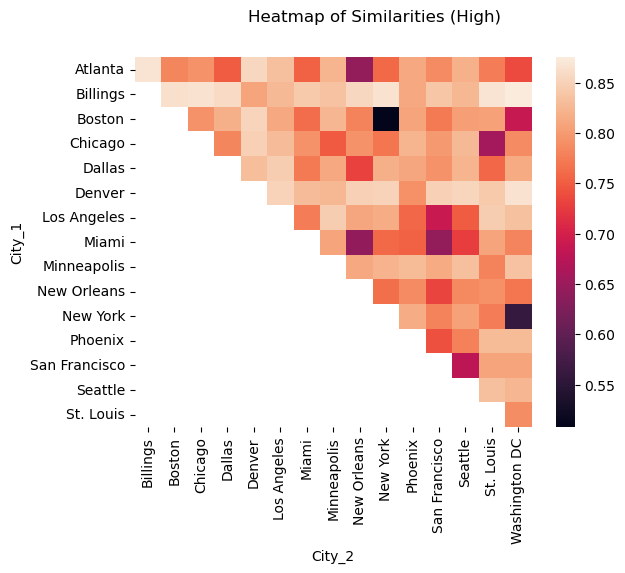

Top 20 Hamming Distances (Daily Lows)


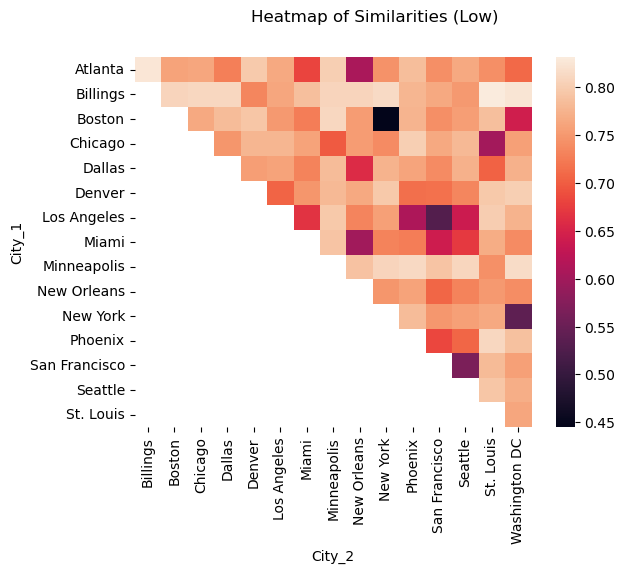

Number of Unique Temperatures Each City's Set:


Wall time: 934 ms


In [21]:
%%time
def plot_hamming_distances(hamming_distances, title):
    df = pd.DataFrame(columns=['City_1', 'City_2', 'Score'])
    for idx, key in enumerate(hamming_distances.keys()):
        city_1, city_2 = key
        score = hamming_distances[key]
        df.loc[idx] = [city_1, city_2, score]

    df = df.pivot("City_1", "City_2", "Score")
    print('\n')
    sns.heatmap(df)
    plt.suptitle(title, fontsize=x_y_label_size)
    plt.show()
    
def create_hamming_table(df, val_type, daily_prefix='', cities=cities):
    pair_labels = []
    pair_sims = []
    for city_1, city_2 in itertools.combinations(cities, 2):
        pair_labels.append((city_1, city_2))
        city_1_temps = df.loc[f'{city_1}:{val_type}'].values
        city_2_temps = df.loc[f'{city_2}:{val_type}'].values
        pair_sims.append(hamming(city_1_temps, city_2_temps))

    hamming_distances = {}
    for pair, distance in zip(pair_labels, pair_sims):
        hamming_distances[pair] = round(distance, 3)

    # Order by key descending
    hamming_distances = {k: v for k, v in sorted(hamming_distances.items(), key=lambda item: item[1], reverse=False)}
    
    # Title
    formatted_title = f'Top 20 Hamming Distances ({daily_prefix}{val_type}s)\n'
    pretty_df(formatted_title, hamming_distances, ['City Pairing', 'Distance'], 8, 5)
    
    plot_hamming_distances(hamming_distances, f'Heatmap of Similarities ({val_type})')

    
create_hamming_table(df_encoded_highs_lows, 'High', 'Daily ', cities)
create_hamming_table(df_encoded_highs_lows, 'Low', 'Daily ', cities)
set_lengths = {}
for city in cities:
    df_filter = city + ':High'
    set_lengths[df_filter.replace(':','(') + ')'] = len(set(df_encoded_highs_lows.loc[df_filter]))
    df_filter = city + ':Low'
    set_lengths[df_filter.replace(':','(') + ')'] = len(set(df_encoded_highs_lows.loc[df_filter]))

pretty_df("Number of Unique Temperatures Each City's Set:\n", set_lengths, ['City', 'Set Count'], 8)

### Calculate Hamming distance for rainy/snowy days

In [22]:
%%time
"""
Establish total rainy|snowy dates per city for 1980 - 2021
"""
df_first_half = weather[weather['time'] < '2001'][['time', 'precipType']]
days_observed = sorted(set(zip(df_first_half['time'].dt.year, df_first_half['time'].dt.month, \
                               df_first_half['time'].dt.day)))

city_precip_days = []
for city in cities:
    df_city = df_first_half[df_first_half.index == city][['time', 'precipType']]
    df_city['year'] = df_city['time'].dt.year
    df_city['month'] = df_city['time'].dt.month
    df_city['day'] = df_city['time'].dt.day
    
    # Record Rain/Snow Days by city per year
    rain_count, snow_count = 0, 0
    prev_year = None
    
    for year, month, day in days_observed:
        city_time_filter = (df_city['year'] == year) & (df_city['month'] == month) & (df_city['day'] == day)
        df_filtered = df_city[city_time_filter]
        precip_types = df_filtered['precipType'].values
        
        # Check precipitation type for each day
        if 'rain' in precip_types:
            rain_count += 1
        elif 'snow' in precip_types:
            snow_count += 1
            
        if year != prev_year and prev_year != None:
            city_precip_days.append([city, year, rain_count, snow_count])
            rain_count, snow_count = 0, 0

        prev_year = year

df_city_precip_days = pd.DataFrame(columns=['City', 'Year', 'Days w/ Rain', 'Days w/ Snow'], data=city_precip_days)
df_city_precip_days.shape

"""
Get average of the first 20 years per city
"""
city_precip_days_avg = []
for city in cities:
    df_filter = (df_city_precip_days['City'] == city) & (df_city_precip_days['Year'] < 2001)
    df_city = df_city_precip_days[df_filter]
    rain_days = round(np.mean(df_city['Days w/ Rain']), 1)
    snow_days = round(np.mean(df_city['Days w/ Snow']), 1)
    city_precip_days_avg.append([city, rain_days, snow_days])

df_city_precip_days_avg = pd.DataFrame(columns=['Location', 'Avg Days w/ Rain', 'Avg Days w/ Snow'], \
                                       data=city_precip_days_avg)
df_city_precip_days_avg.set_index(['Location'], inplace=True)
display(df_city_precip_days_avg)

Avg Days w/ Rain  Avg Days w/ Snow
Location                                         
Atlanta                   206.2               1.1
Billings                  163.8              34.7
Boston                    181.0              13.8
Chicago                   186.2              27.4
Dallas                    180.1               1.9
Denver                    167.4              31.4
Los Angeles                85.8               0.0
Miami                     278.7               0.0
Minneapolis               156.8              42.4
New Orleans               225.5               0.1
New York                  183.9              13.3
Phoenix                    88.7               0.0
San Francisco             110.2               0.0
Seattle                   224.3               0.9
St. Louis                 182.0              12.3
Washington DC             177.9               6.8

Wall time: 1min 29s


In [23]:
%%time
"""
Establish total rainy|snowy deviation from average 2001 - 2021
"""
df_first_half = weather[weather['time'] > '2000'][['time', 'precipType']]
days_observed = sorted(set(zip(df_first_half['time'].dt.year, df_first_half['time'].dt.month, \
                               df_first_half['time'].dt.day)))

city_precip_days = []
for city in cities:
    df_city = df_first_half[df_first_half.index == city][['time', 'precipType']]
    df_city['year'] = df_city['time'].dt.year
    df_city['month'] = df_city['time'].dt.month
    df_city['day'] = df_city['time'].dt.day
    
    # Record Rain/Snow Days by city per year
    rain_count, snow_count = 0, 0
    prev_year = None
    
    for year, month, day in days_observed:
        city_time_filter = (df_city['year'] == year) & (df_city['month'] == month) & (df_city['day'] == day)
        df_filtered = df_city[city_time_filter]
        precip_types = df_filtered['precipType'].values
        
        # Check precipitation type for each day
        if 'rain' in precip_types:
            rain_count += 1
        elif 'snow' in precip_types:
            snow_count += 1
            
        if year != prev_year and prev_year != None:
            rain_difference = df_city_precip_days_avg.loc[city]['Avg Days w/ Rain'] - rain_count
            snow_difference = df_city_precip_days_avg.loc[city]['Avg Days w/ Snow'] - snow_count
            city_precip_days.append([city, int(year), rain_difference, snow_difference])
            rain_count, snow_count = 0, 0

        prev_year = year

df_city_precip_diff = pd.DataFrame(columns=['City', 'Year', 'Days w/ Rain Difference', 'Days w/ Snow Difference'], \
                                   data=city_precip_days)
df_city_precip_diff.shape

Wall time: 1min 34s


(336, 4)

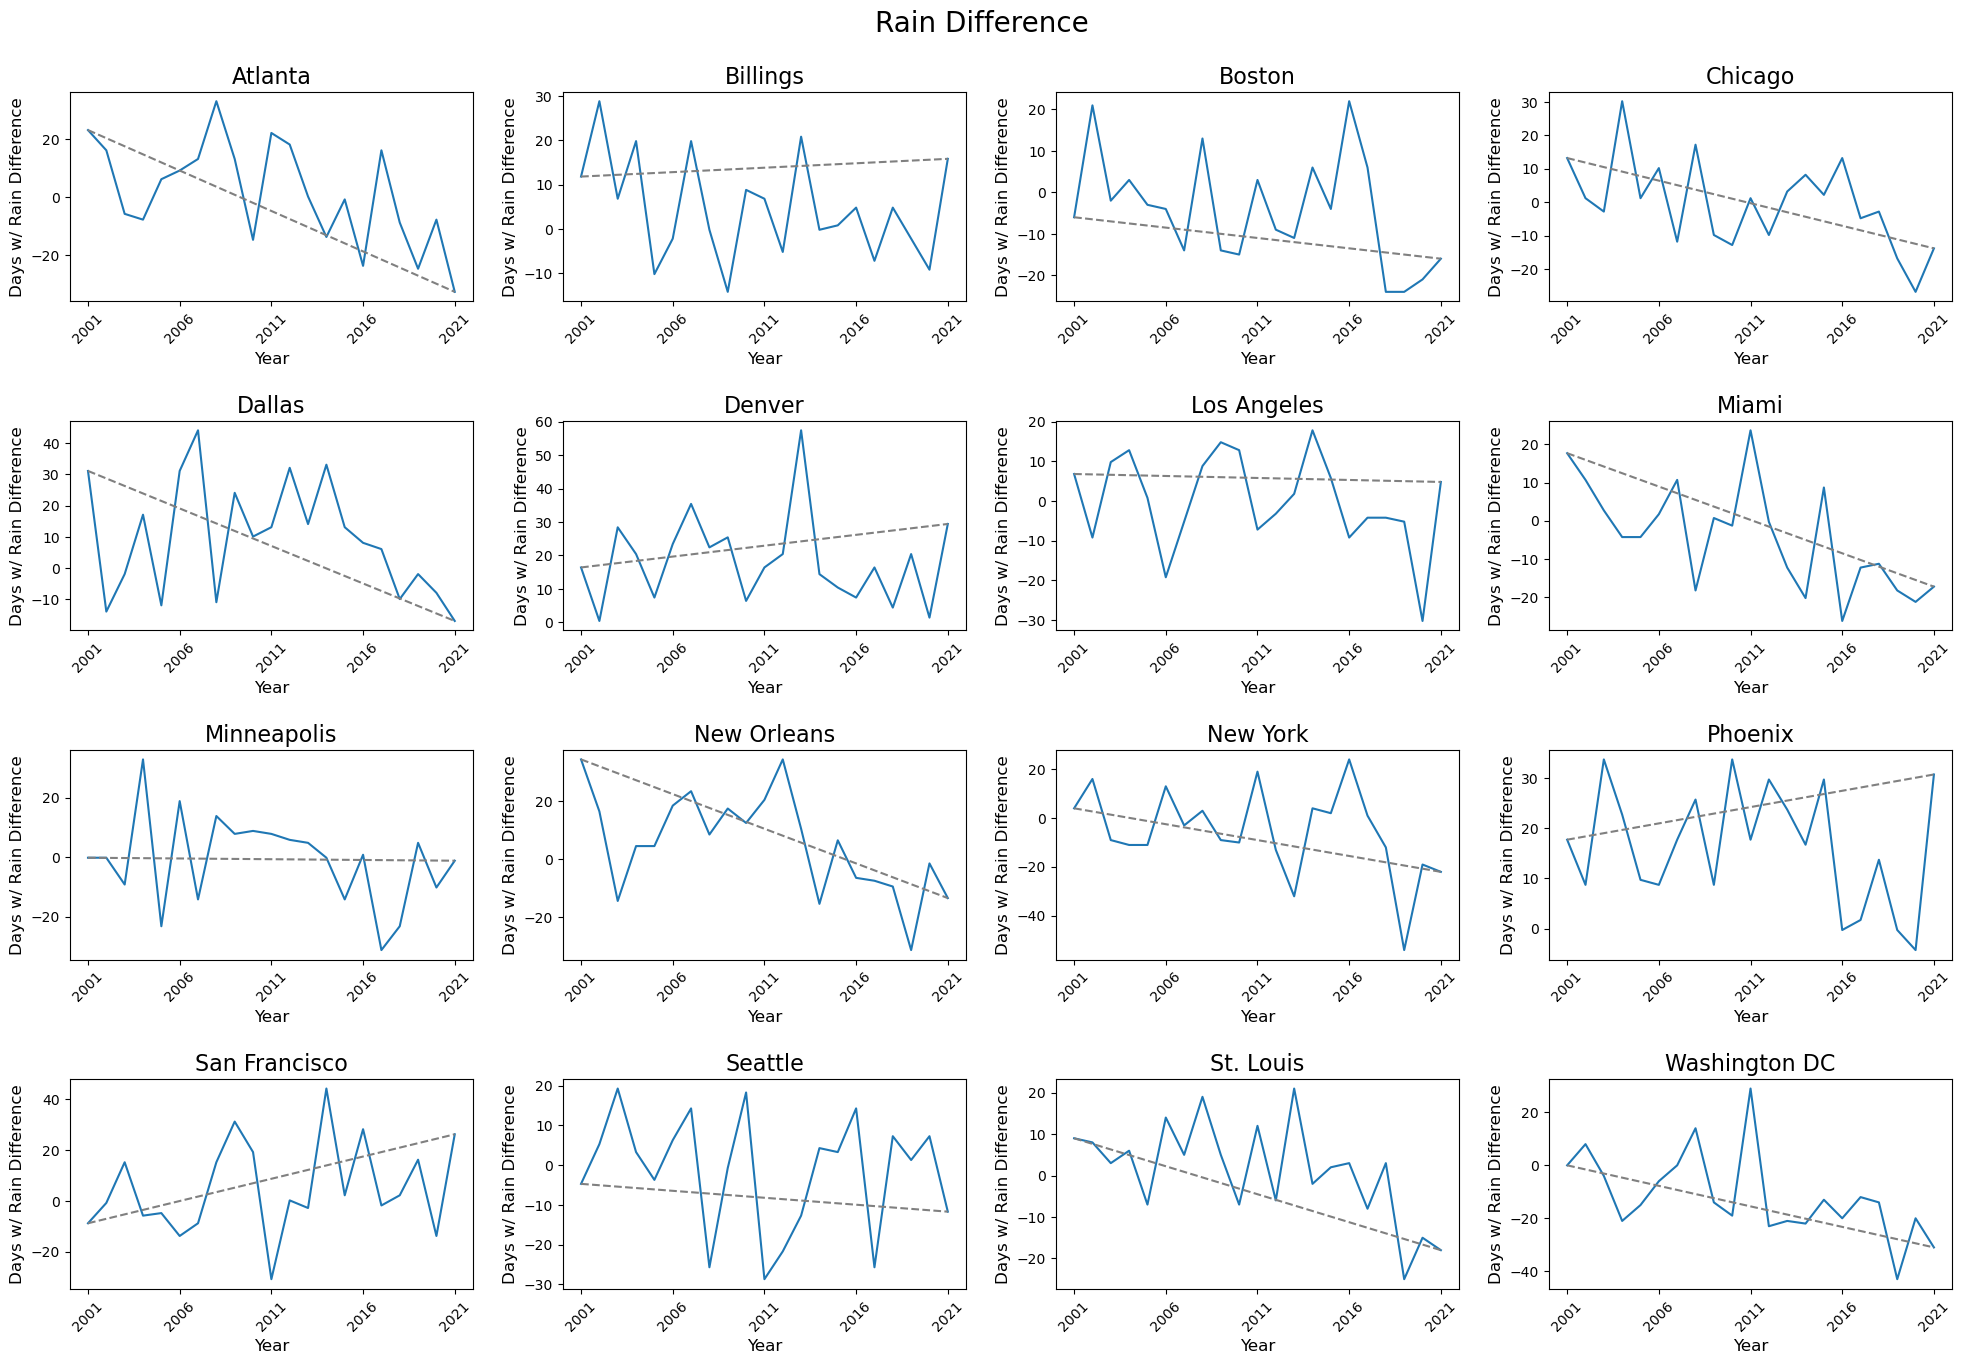

In [24]:
plot_yearly(df_city_precip_diff, 'Days w/ Rain Difference', 'Rain Difference')

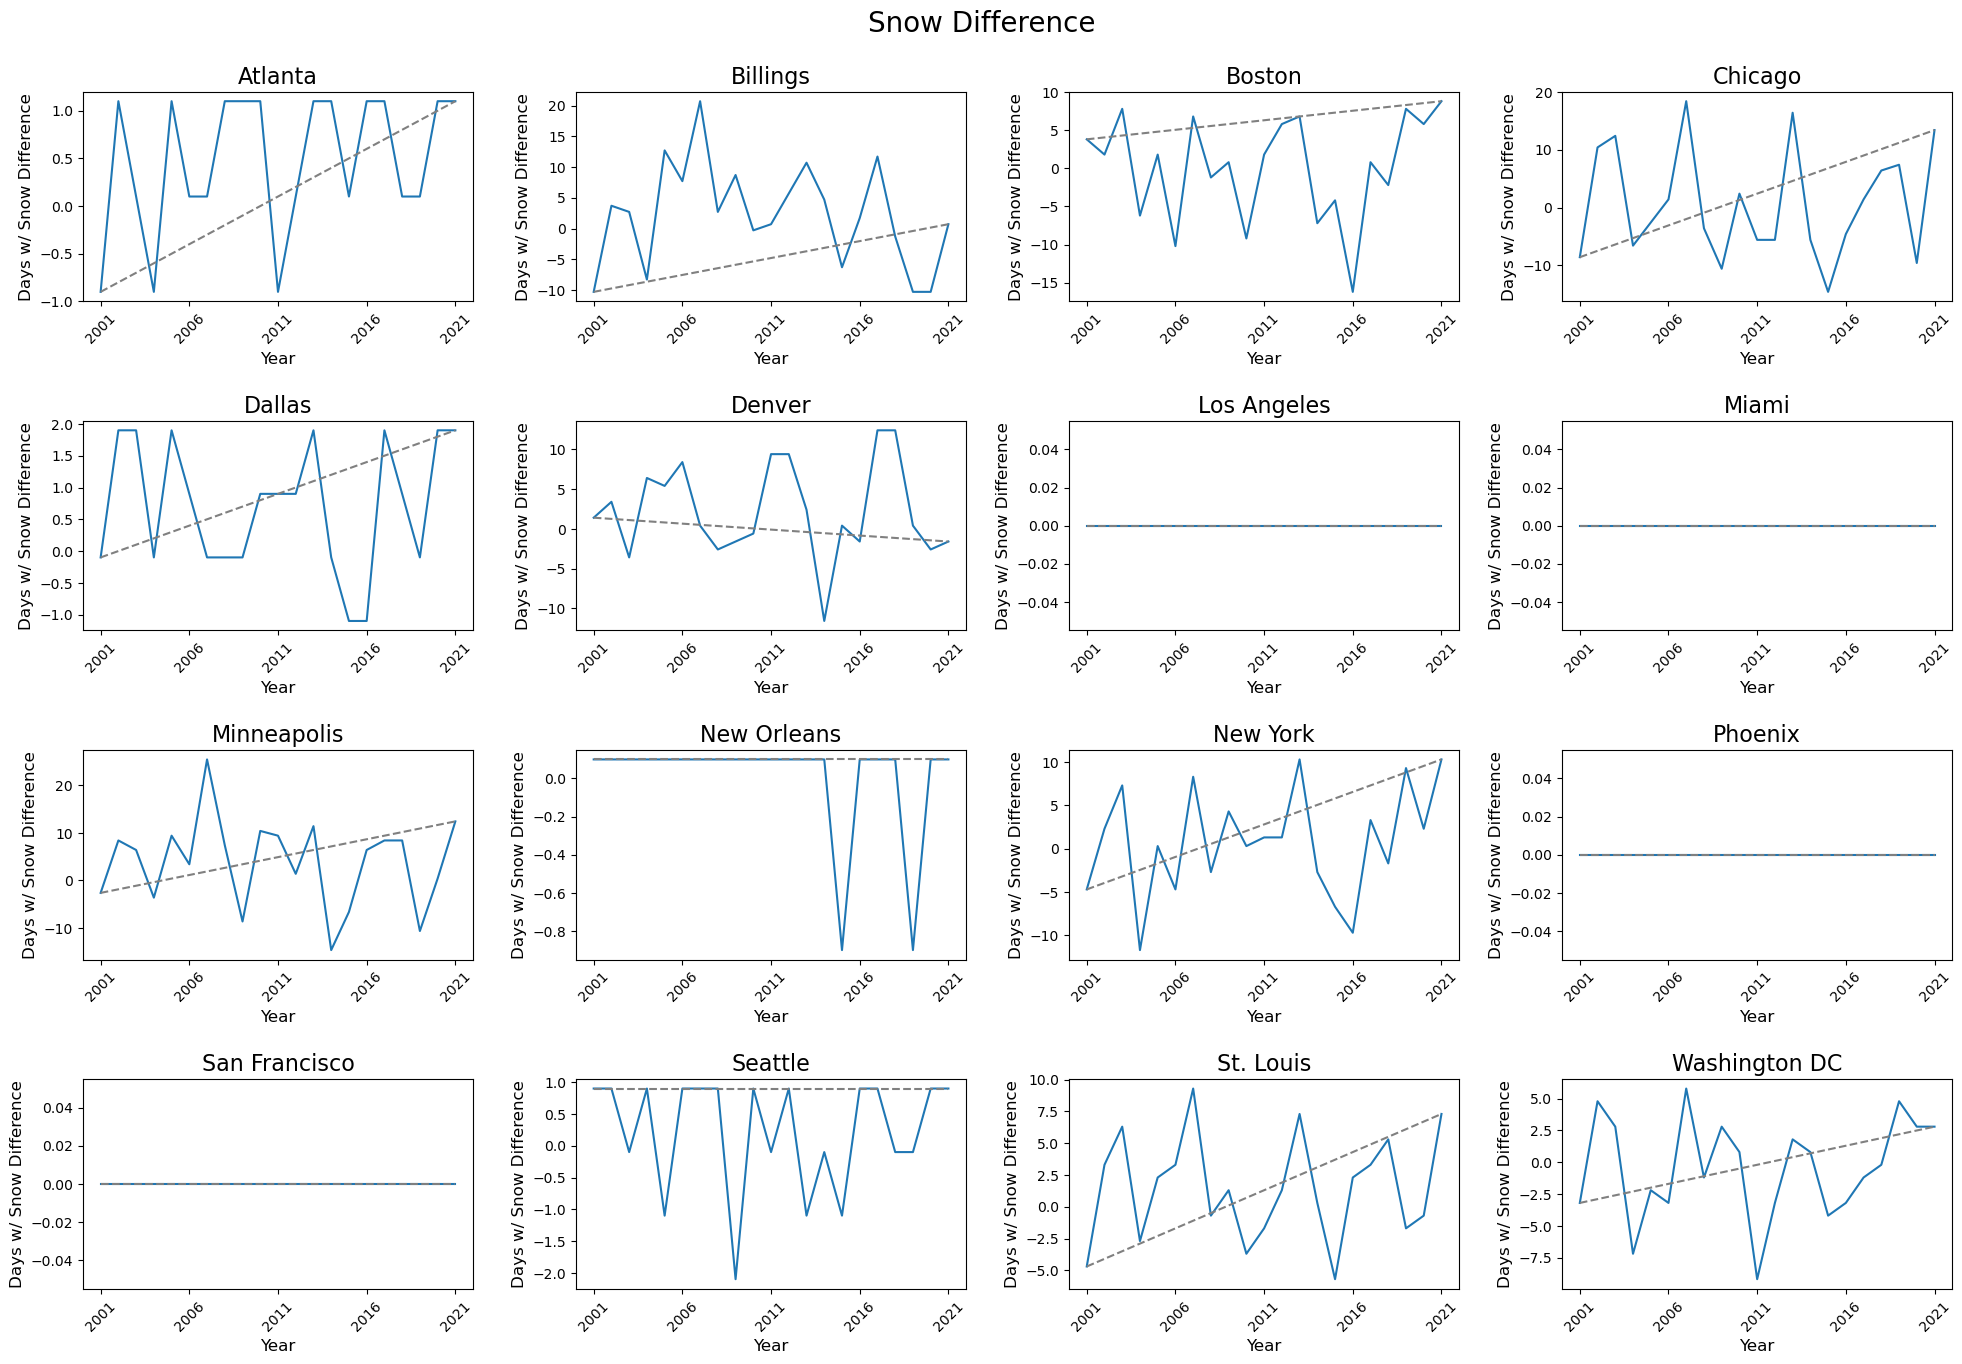

In [25]:
plot_yearly(df_city_precip_diff, 'Days w/ Snow Difference', 'Snow Difference')

### Calculate Hamming distance for precipitation

Top 20 Hamming Distances (Days w/ Rain Differences)


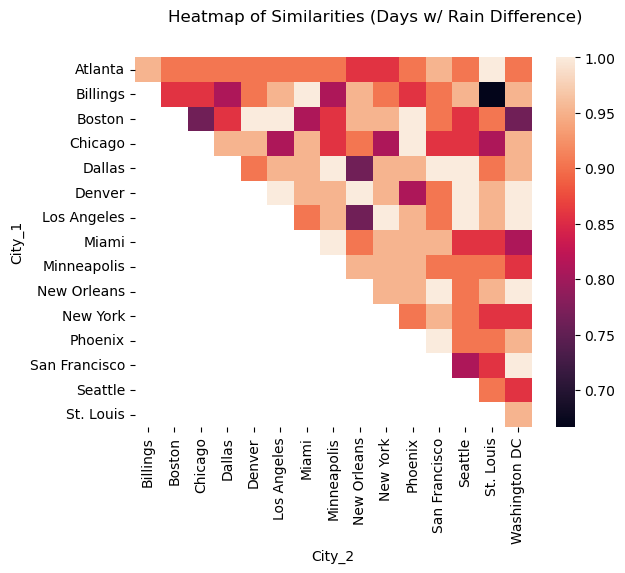

Top 20 Hamming Distances (Days w/ Snow Differences)


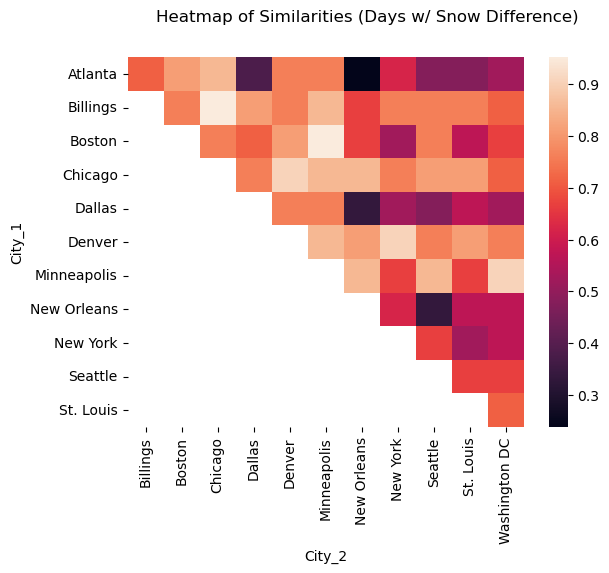

Number of Unique Precipitation Totals for Each City's Set:


In [26]:
# Initialize data frame
cols = ['Location:Type']
cols.extend(list(np.unique(df_city_precip_diff['Year'])))
df_encoded_precip = pd.DataFrame(columns=cols)

row_count = 0
for city in cities:
    
    for precip_type in ['Days w/ Rain Difference', 'Days w/ Snow Difference']:
        # Get the daily precipitation differences from the mean per city
        df_filter = df_city_precip_diff['City'] == city
        city_precip_vector = df_city_precip_diff[df_filter][precip_type]
    
        # Encode the temperature differences
        df_encoded_precip.loc[row_count] = encode_list(city_precip_vector, f'{city}:{precip_type}')
        
        row_count += 1

df_encoded_precip.set_index('Location:Type', inplace=True)

# Generate set lenghts to visualize amount of variation per city
set_lengths = {}
for city in cities:
    df_filter = city + ':Days w/ Rain Difference'
    set_lengths[df_filter.replace(':',' (') + ')'] = len(set(df_encoded_precip.loc[df_filter]))
    df_filter = city + ':Days w/ Snow Difference'
    set_lengths[df_filter.replace(':',' (') + ')'] = len(set(df_encoded_precip.loc[df_filter]))

create_hamming_table(df_encoded_precip, 'Days w/ Rain Difference', '', cities)

# Remove Los Angeles, Miami, Phoenix and San Francisco since they do not have snowy days
def find_in_name(names, row_name):
    for name in names:
        if name in row_name:
            return True
    return False

for idx, row in df_encoded_precip.iterrows():
    drop =  find_in_name(['Los Angeles', 'Miami', 'Phoenix', 'San Francisco'], row.name)
    if drop:
        df_encoded_precip.drop([row.name], axis=0, inplace=True)
updated_cities = set(cities).difference(set(['Los Angeles', 'Miami', 'Phoenix', 'San Francisco']))
updated_cities = sorted(list(updated_cities)) # Organizes columns for heatmap
create_hamming_table(df_encoded_precip, 'Days w/ Snow Difference','', updated_cities)

pretty_df("Number of Unique Precipitation Totals for Each City's Set:\n", \
          set_lengths, ['City (Precipitation Type)', 'Set Count'], 4)

## Hamming distance summary
Hamming distance measures how similar two vectors are. The lower the score, the more similar the vector is (if two vectors are identical, the Hamming distance is; if completely opposite, the score is 1). The vector for each city is encoded to a value that represents the measurements depart from the previous 20 years' average. Since Hamming does not calculate using sets like Jaccard similarity, the dataset is more appropriate for Hamming distance.

The results for high temperatures are as expected. We see cities in proximity to each other experiencing the same difference from average in the past two decades. Boston & New York had the highest similarity (value closest to zero). Followed by New York & Washington DC; Miami & New Orleans; Atlanta & New Orleans... Hamming distance scores do not mean the temperatures themselves are similar, but the cities are experiencing similar changes. We can deduce that regions in the country are experiencing different climate changes since the scores are different. Hamming distance does not indicate the severity of the change. Because Boston & New York have a high score, it does mean they see the biggest or smallest changes, just that their changes are similar. The correlation matrix gives a visual picture of all cities and how their scores ranked. The same theme appears in low temperatures as high temperatures, though the rankings slightly vary.

The next measurement looked at variations from the number of snowy/rainy days in the recent decades compared to the first 20 years. We are not measuring the amount of precipitation, just the occurrence of it. As expected, warmer climates have no snow days measured. Reviewing just the rainy days, we see most cities are seeing less rain. Conversely, the cities where snow falls are seeing more snow days. The charts for cities that have seen their first snowfall in the past 41 years will have an exaggerated trend line. We would assume climate change with warmer temperatures would result in fewer snow days. Conversely, the change has created more storms with temperatures cold enough still for snow. The precipitation Hamming distance indicates mostly Midwestern and Eastern cities have seen the same changes. Based on the time series plots, that means less rain days and more snow days, relatively. 

## Clustering

#### Find knee in number of clusters function

In [27]:
"""
Lesson 07: Clustering
Copyright 2021, 2022, 2023, Stephen F. Elston. All rights reserved.
"""
def knee_plot(df, upper=16):
    if 'cluster_assignments' in df.columns: df.drop(columns='cluster_assignments', inplace=True)
    WCSS=[]
    for cluster in range(1, upper):
        kmeans = KMeans(n_clusters=cluster, random_state=42)
        kmeans.fit_predict(df)
        WCSS.append([cluster, kmeans.inertia_])

    df_plot = pd.DataFrame(columns=['Cluster', 'Inertia'], data=WCSS)
    sns.lineplot(x='Cluster', y='Inertia', data=df_plot)
    plt.title('Knee Plot: WCSS vs Number of Clusters\n')
    plt.show()

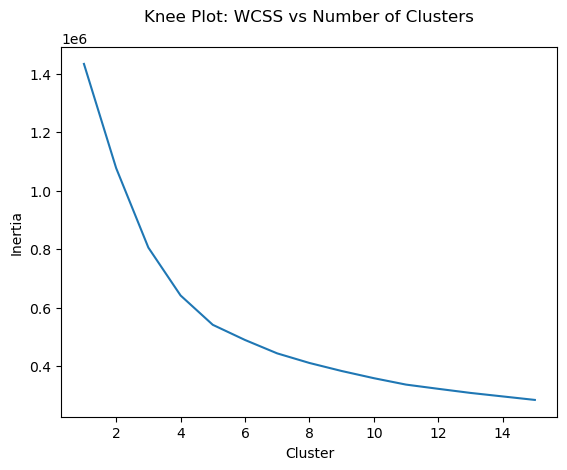

Wall time: 31min 6s


In [28]:
%%time
# Normalize values and impute missing values
normalize_cols = weather.select_dtypes(include='number').columns.tolist()
imputer = SimpleImputer(strategy='mean')
weather_kmeans = imputer.fit_transform(weather[normalize_cols])
weather_kmeans = pd.DataFrame(MinMaxScaler().fit_transform(weather_kmeans), columns=normalize_cols, index=weather.index)

knee_plot(weather_kmeans)

#### Display grouping of cluster to labels function

In [29]:
def display_clusters(n_clusters, df, index_key, condense=False):
    clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(df)
    df['cluster_assignments'] = clusters

    # Create a frequency table of the number of climate based on cluster assignments
    cluster_vals = np.unique(df['cluster_assignments'])
    cluster_df = pd.DataFrame(columns=cluster_vals)

    grouped = df.groupby(index_key)['cluster_assignments']
    for name, group in grouped:
        bin_vals = np.bincount(group, minlength=len(cluster_vals))
        group_clusters = []
        for value, count in zip(cluster_vals, bin_vals):
            group_clusters.extend([count])
        cluster_df.loc[name] = group_clusters

    if condense:
        cluster_df = condense_df(cluster_df)
    display(cluster_df)
    

def condense_df(df):
    cols = ['City (temp type)']
    col_label = []
    for col in list(df.columns):
        col_label.extend([f'Cluster: {col}'])

    cols.extend(col_label)
    cols = cols * 2
    city_row_df = pd.DataFrame(columns=cols)
    odd = True
    for idx, row in df.iterrows():
        row_name = row.name.replace(':', ' (') + ')'
        if odd:
            new_row = [row_name]
            new_row.extend(row.values)
        else:
            new_row.extend([row_name])
            new_row.extend(row.values)
            city_row_df.loc[idx] = new_row

        odd = not odd

    city_row_df = city_row_df.reset_index(drop=True)
    return city_row_df.style.hide(subset=None)

### City climate

In [30]:
%%time
display_clusters(5, weather_kmeans, 'location')

0       1       2      3       4
Atlanta        117726   87376       0  72489   90593
Billings         1769   29466  299102  35802    2045
Boston          85667   68390       0  71175  142952
Chicago         80422  101958       0  64101  121703
Dallas         150943   93236       0  66517   57488
Denver              0       0  353339  14845       0
Los Angeles    177447  123685       0  41168   25884
Miami          174908  121227       0  53379   18670
Minneapolis     72706   87948       0  66478  141052
New Orleans    170795   96931       0  64724   35734
New York        91564   66153       0  70998  139469
Phoenix        140999  163429       0  18123   45633
San Francisco  105718   51484       0  52161  158821
Seattle         72562  135915       0  91367   68340
St. Louis      106759   92077       0  66330  103018
Washington DC  102949   74351       0  67567  123317

Wall time: 1min 13s


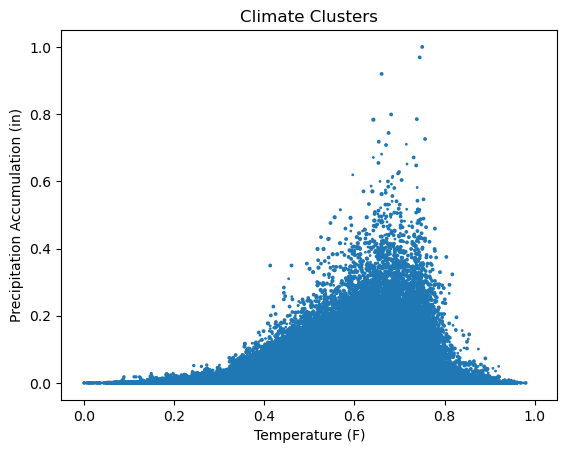

In [31]:
# Create a scatter plot of temperature and precipitation
plt.scatter(weather_kmeans['temperature'], weather_kmeans['precipAccumulation'],
            weather_kmeans['cluster_assignments'], cmap='viridis')

# Set the axis labels and plot title
plt.xlabel('Temperature (F)')
plt.ylabel('Precipitation Accumulation (in)')
plt.title('Climate Clusters')

# Show the plot
plt.show()

### Temperature departures from average

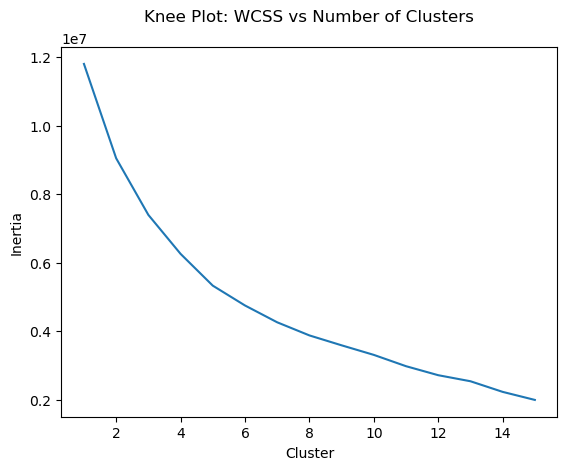

Wall time: 3.1 s


In [32]:
%%time
# Data is already centered about 0, no need to normalize
temps_kmeans = df_city_day_dev.copy()
knee_plot(temps_kmeans)

In [33]:
display_clusters(5, temps_kmeans, 'Location:Type', condense=True)

### Precipitation departures from average

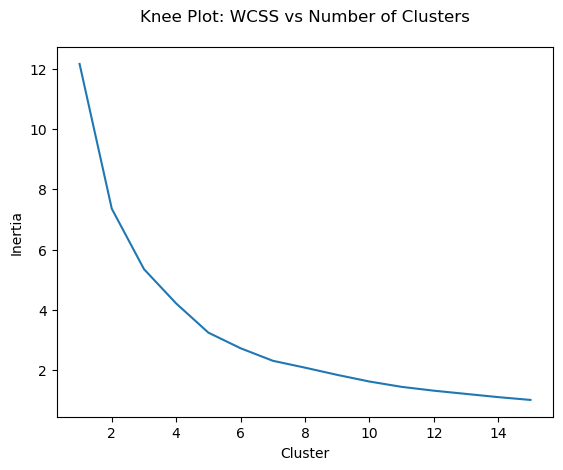

Wall time: 1.13 s


In [34]:
%%time
df_precip_kmeans = df_city_precip_diff.copy()
df_precip_kmeans.drop(['Year'], axis=1, inplace=True)
df_precip_kmeans.set_index(['City'], inplace=True)

# Normalize values and impute missing values
normalize_cols = df_precip_kmeans.select_dtypes(include='number').columns.tolist()
imputer = SimpleImputer(strategy='mean')
precip_kmeans = imputer.fit_transform(df_precip_kmeans[normalize_cols])
precip_kmeans = pd.DataFrame(MinMaxScaler().fit_transform(precip_kmeans),
                             columns=normalize_cols, index=df_precip_kmeans.index)

knee_plot(precip_kmeans)

In [35]:
display_clusters(3, precip_kmeans, 'City')

0   1   2
Atlanta         0  10  11
Billings        8   9   4
Boston          7   5   9
Chicago         7   6   8
Dallas          0  13   8
Denver          5  14   2
Los Angeles     0   9  12
Miami           0   5  16
Minneapolis    12   5   4
New Orleans     0  13   8
New York        5   6  10
Phoenix         0  17   4
San Francisco   0   8  13
Seattle         0   9  12
St. Louis       4   8   9
Washington DC   1   3  17

## Clustering summary
The within-cluster sum of squares (WCSS) began to have diminishing returns around 5 clusters. Using the knee plot to review the best choice of clusters, we chose 5.

Based on the clustering, we see some similarites. With domain knowledge, we know that Denver and Billings have similar climates. It would be unusual to see a warm, muggy climate like New Orleans or Miami to cluster the same as those cities. We also see Boston, Washington DC and New York have the about the same distribution among the clusters. This makes sense due to their proximity along the U.S. East Coast. Finally, which remains consistent, Chicago and Minneapolis have similar cluster distributions.

For the climate clustering plot, we wanted to show the distribution of the climates among the cities. Being all cities are in the continental U.S., we would not expect to see the disparity of the region, like the Sahara Desert to the tundra of Siberia. Normalized between 0 and 1, we see most clusters appear between .6 and .7 on the x-axis (temperature) and .2 to .3 on the y-axis (precipitation accumulation). The cities as a whole appear to be temperately warm with a fair amount of precipitation.

Next, we clustered on temperature departures from average. This would give us a sense of which cities, by unsupervised learning, are alike appearing in the same clusters. The knee plot suggested 5 clusters would be the optimal choice. The clusters were run on high and low temperatures separately. For the highs and lows, we see Washington DC, New York and Boston grouped in the same cluster. Further confirmation, the cities are close to each other and have experienced the same temperature departures. Miami was interestingly grouped with Western cities; Billings and Denver together, and the Southern cities minus Miami but instead Dallas. Cluster 2 all contained the Midwestern cities: St. Louis, Minneapolis, and Chicago. The temperature clustering suggest climate change differs across the country. Again, this is looking at encoded temperature departures, not the actual temperatures.

Finally, for precipitation, the knee plot recommends using only 3 clusters. This is not as informative as the temperature clustering. By consulting other plots, we saw precipitation averages for Minneapolis dropping. That city dominates the first cluster. Phoenix has the highest count in cluster 2, which, like Minneapolis, has lower precipitation averages over the past few decades. Washington DC has the highest counts in cluster 3, which has seen an increase in precipitation. Cluster 3 also has high counts for San Francisco and Seattle, which have dropped and remained relatively flat, respectively. These clusters do not give clear results.

## Time series

#### Plot time series function

In [36]:
def plot_time_series(df, xLabel='Date', yLabel='Temperature', title=''):
    fig, ax = plt.subplots(figsize=(16, 6))
    df.plot(ax=ax)
    plt.xlabel(xLabel, fontsize=x_y_label_size)
    plt.ylabel(yLabel, fontsize=x_y_label_size)
    plt.suptitle(title, fontsize=subtitle_size)
    plt.show()

#### Window average with length and stride  function

In [37]:
"""
Lesson 02: Streaming
Copyright 2021, 2022, 2023, Stephen F. Elston. All rights reserved.
"""
def window_average(ts, length=16, stride=8):
    ts = df_city.copy()
    length=16
    stride=8
    half_length = int(length/2)-1
    idx = []
    out = []

    for ix_end in range(length, len(ts), stride):
        ix_start = ix_end - length  
        sample = df_city.iloc[ix_start:ix_end]
        out.append(sample.mean())
        idx.append(sample.index[half_length])
    out = pd.DataFrame(out, index=idx)    

    return out

#### Exponential smooth function

In [38]:
"""
Lesson 02: Streaming
Copyright 2021, 2022, 2023, Stephen F. Elston. All rights reserved.
"""
def exponential_smooth(ts, alpha=0.01, stride=8):
    in_index = ts.index
    idx = []
    st = ts.iloc[0]
    out = []
    for ix in range(1, len(ts)):
        st = alpha * ts.iloc[ix] + (1-alpha) * st           
        if ix % stride == 0:
            out.append(st)
            idx.append(ix)
    out = pd.DataFrame(out, index=idx)    
    
    return out  

### Show all observations for only Atlanta's average highs 

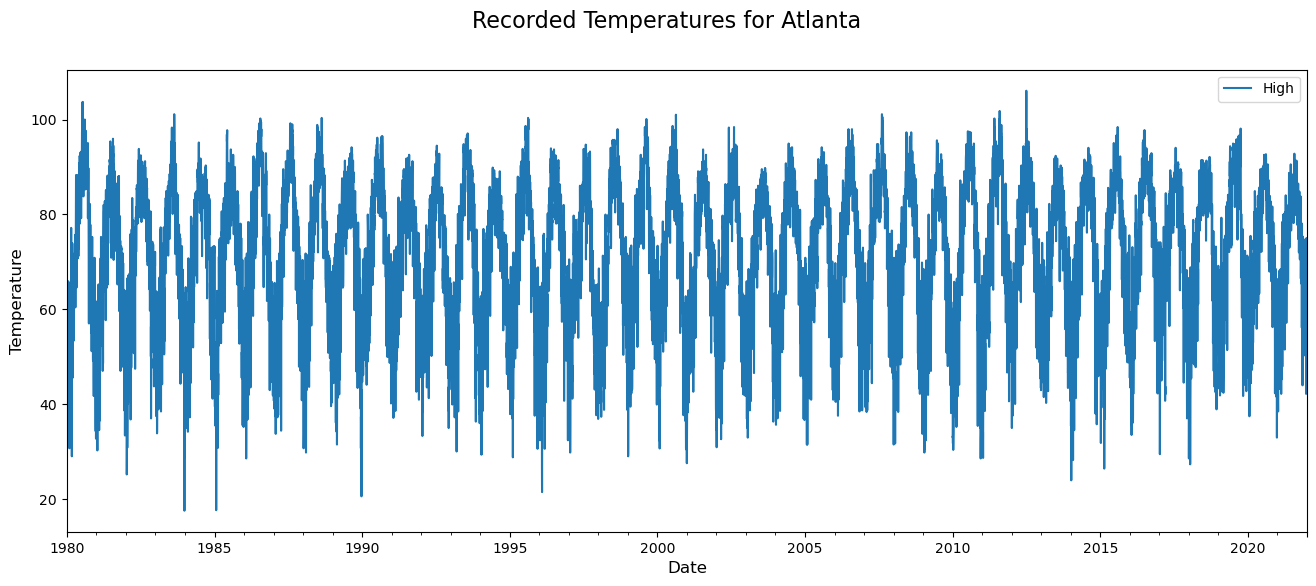

In [39]:
df_city = df_city_daily_obs[df_city_daily_obs['City']=='Atlanta'][['Date', 'High']]
df_city.set_index(['Date'], inplace=True)
plot_time_series(df_city, title=f'Recorded Temperatures for Atlanta')

### Compress time series (90 days, step 45)

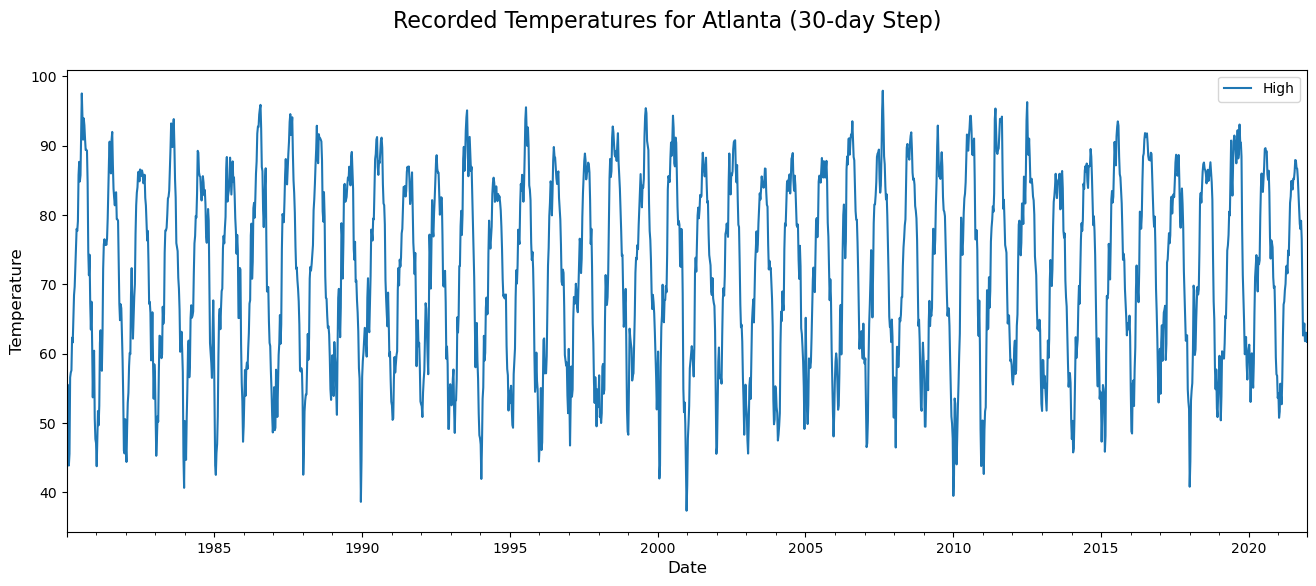

In [40]:
out = window_average(df_city, 90, 45)
plot_time_series(out, title=f'Recorded Temperatures for Atlanta (30-day Step)')

#### Apply exponential decay on high temperatures

In [41]:
def plot_trend(col, obs_type, xlabel): 
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
#     fig.subplots_adjust(right=0.95)  # adjust the right margin of the figure to make room for the legend box

    i, j = 0, 0
    for cnt, city in enumerate(cities):
        if cnt < 4:
            i , j = 0, 0
        elif cnt < 8:
            i, j = 0, 1
        elif cnt < 12:
            i, j = 1, 0
        else:
            i, j = 1, 1

        df_city = df_city_daily_obs[df_city_daily_obs['City']==city][['Date', col]]
        df_city.set_index(['Date'], inplace=True)
        df_city = exponential_smooth(df_city, alpha=0.01, stride=365)
        
        # City label is justified to the same length so the legends print in the same location
        ax[i, j].plot(df_city[col], label=city)
        ax[i, j].legend(fontsize=legend_font_size, loc='lower right')
        
        # Plot line to show trend
        y_first = df_city.iloc[0][col]
        x_first = df_city.iloc[0].name
        y_last = df_city.iloc[-1][col]
        x_last = df_city.iloc[-1].name
        ax[i, j].plot([x_first, x_last], [y_first, y_last], linestyle='--', color='gray')
        ax[i, j].set_xlabel('Days', fontsize=x_y_label_size)
        ax[i, j].set_ylabel(f'{xlabel}', fontsize=x_y_label_size)
            
    plt.suptitle(f'{obs_type} Trend over the Past 40 Years', fontsize=subtitle_size)
    plt.tight_layout()
    plt.show()

### Apply exponential decay on high temperature averages

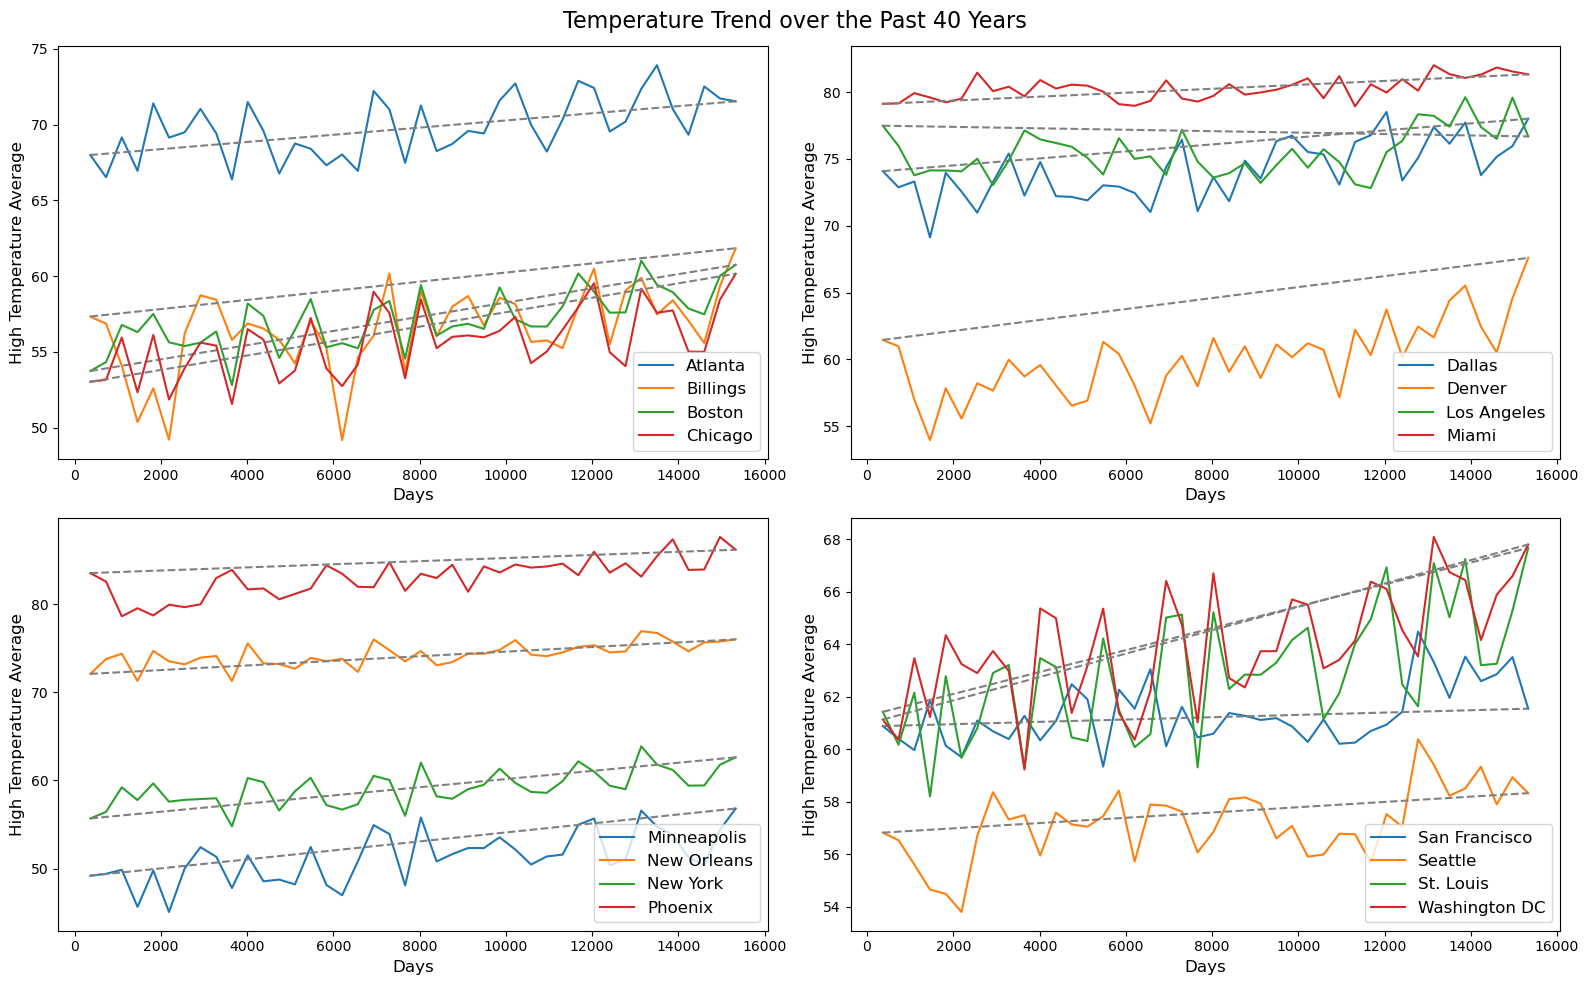

In [42]:
plot_trend('High', 'Temperature', 'High Temperature Average')

### Apply exponential decay on daily precipitation totals

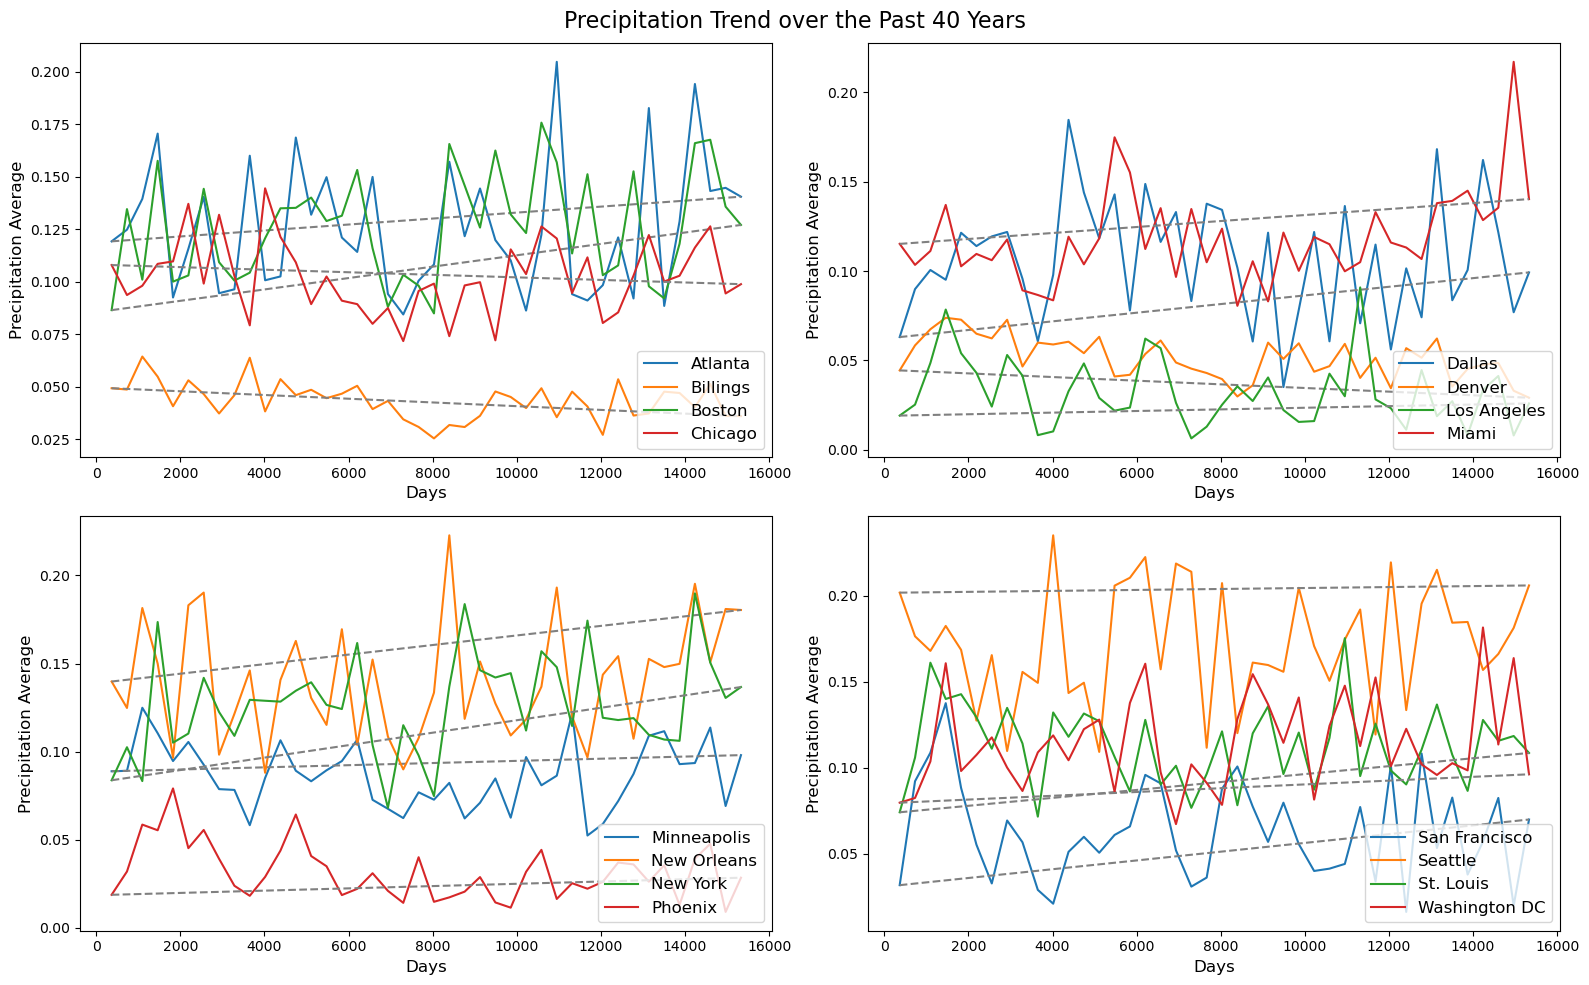

In [43]:
plot_trend('24 Hour Precip', 'Precipitation', 'Precipitation Average')

### Apply exponential decay on daily humidity

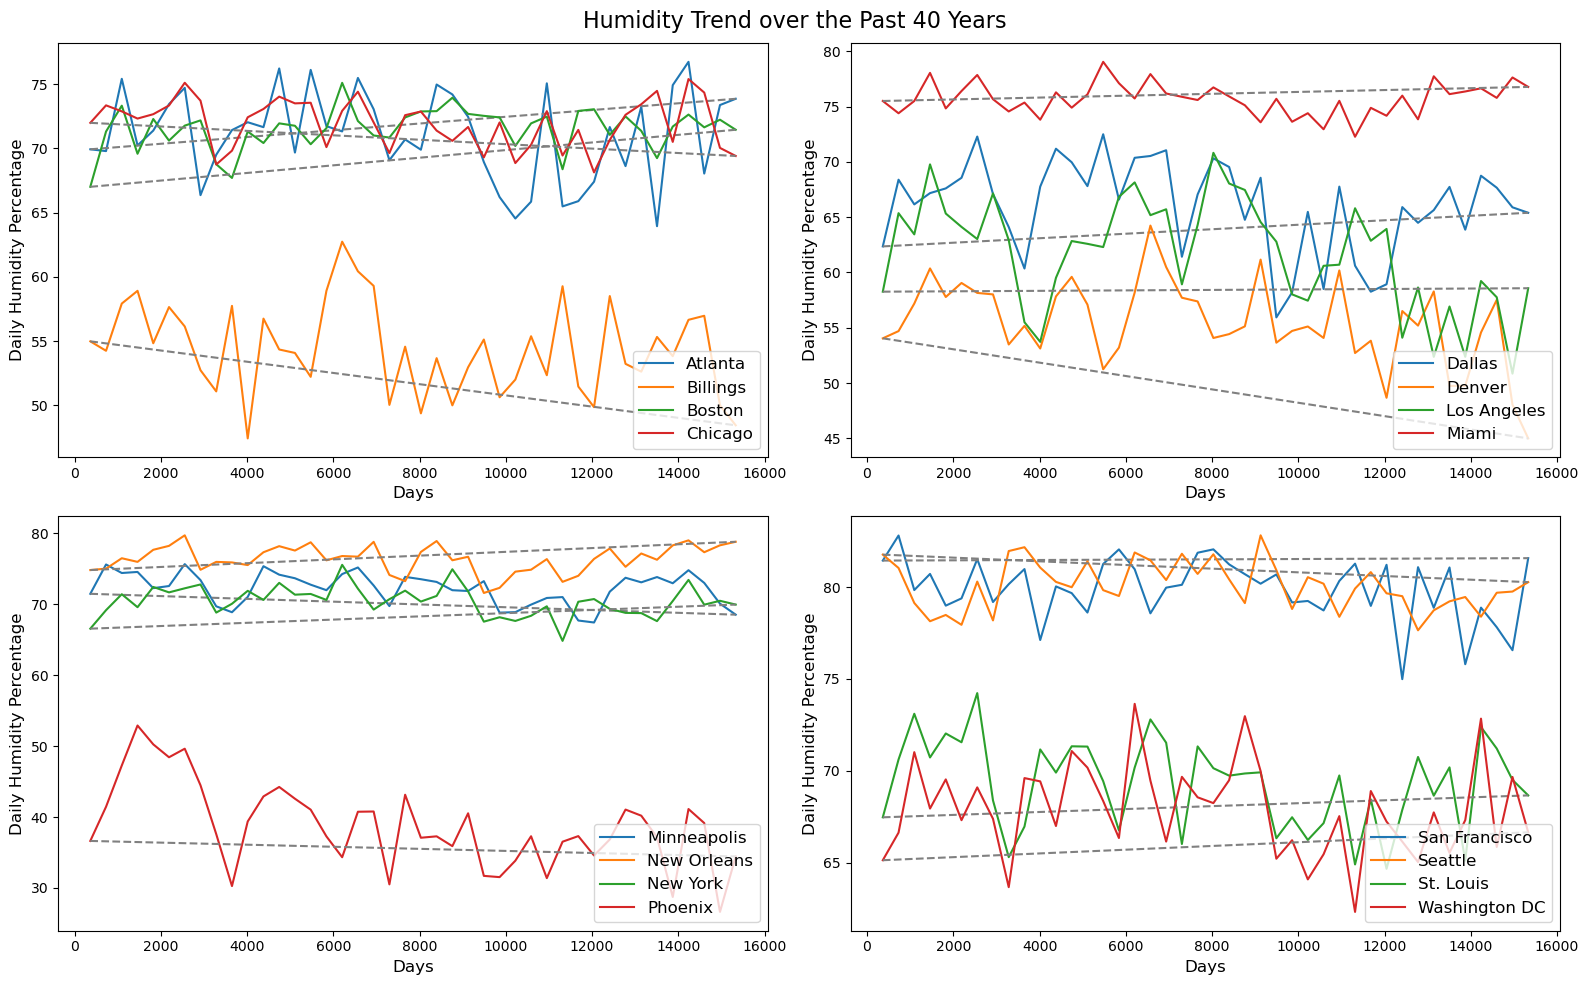

In [44]:
plot_trend('Humidity', 'Humidity', 'Daily Humidity Percentage')

### Apply exponential decay on daily max wind speeds

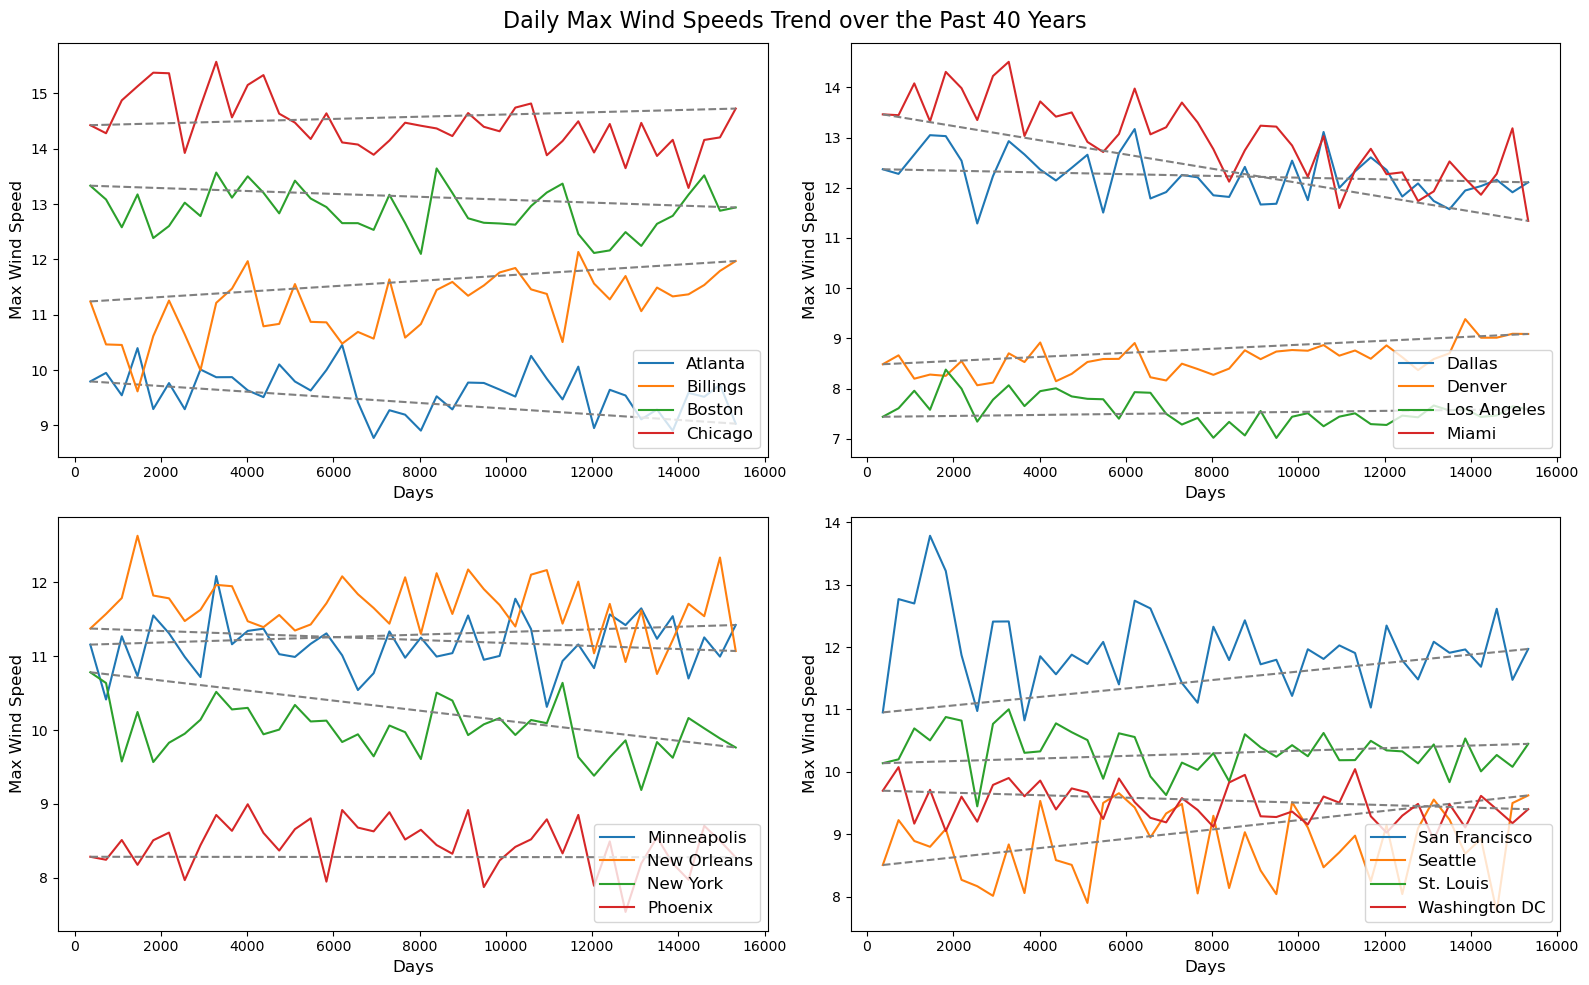

In [45]:
plot_trend('Max Wind', 'Daily Max Wind Speeds', 'Max Wind Speed')

## Time series summary

By testing on just Atlanta, we see compression for the data stream for shows the same plot as the full data stream. Since that is the case, we can attempt exponential decay on the data. The decay puts more emphasis on less recent observations with `alpha=.01`. Because of the emphasis on past values, we can see a trend in the temperatures better. It is apparent from the exponential decay plots that temperature averages for most cities are on the rise for the past 40 years.

The seasonality has been eliminated since we set the stride to 365 days. This allows us to examine the progression of the averages from year to year. Otherwise, the decay would be subject to the swings in seasonal temperature changes, which would confuse the algorithm with local maxima/minima.

By plotting the exponential decay with a trend line added, we can see almost all cities have their average temperatures rising. The only exception is Los Angeles. The U.S. Northeast cities have the sharpest increase, while the cities on the West Coast have a steady or slower increase.

Rainfall in the West remains pretty constant, while the cities more in the central portion of the U.S. see a downturn in precipitation totals (Chicago, Billings, Denver). Since these are daily totals, not yearly, this gives an idea of the strength of each rain event. Any increased trend indicates heavier rain events. The same can be said for the wind speeds: any increase indicates stronger pressure systems. There may be some trends that can be deciphered from the humidity time series. However, it just appears to be white noise without anything instantly discernible.

These trends show indeed that some areas are getting warmer, wetting, drier, or cooler. Generally, most cities see an increase in temperatures and increase in precipitation.

# Conclusion
All metrics used in the project point to one striking conclusion: The averages for each city show a trend. A true average should just have a zero slope around the mean values. Whether it is temperatures, precipitation, amount of precipitation days or extreme weather events, the changes are evident.

We see correlations in the data among cities in the same region of the country. Because of these similarities, we can justify certain regions of the country are changing differently. San Francisco and Seattle see negligible change; Los Angeles and Phoenix are getting drier, and the majority of East Coast cities are getting both hotter and wetter. The U.S. mountainous regions have different experiences, with Denver and Billings not noticing the extremes that other Midwestern cities like Chicago and St. Louis exhibit.

Since the range of years is only 41, there certainly could be larger seasonality other than per year that may be in play. The first 20 years was used as the basis for averages, then compared to the next 21 years. The selection of train/test might show some bias as well. However, different models all showed the same results. Whether it was the time series, clustering, Hamming distances or Jaccard similarities, they all indicate a changing environment. As hypothesized in the abstract, not all cities are experiencing the same change. This might result in moving populations across the country as more areas as less habitable if the observed patterns continue. With modern conveniences, humans can endure colder and hotter temperatures. Flora and fauna will not fare as well if the climates continue to be more extreme. 